# Librerías

In [1]:
!pip install seaborn plotly scikit-learn xgboost
import pandas as pd
from sklearn.linear_model import Ridge
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import warnings 
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


# Lectura del dataset

In [2]:
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Escritorio\ML_Bancolombia_Leader_Test\Punto_1\restaurants_dataset.csv")
print(f"Dimensión del dataset: {data.shape}  (filas, columnas)\n")
print("Tipos de datos por columna:\n", data.dtypes, "\n")
data.head()

Dimensión del dataset: (3493, 34)  (filas, columnas)

Tipos de datos por columna:
 Registration Number                int64
Annual Turnover                    int64
Cuisine                           object
City                              object
Restaurant Location               object
Opening Day of Restaurant         object
Facebook Popularity Quotient     float64
Endorsed By                       object
Instagram Popularity Quotient    float64
Fire Audit                         int64
Liquor License Obtained            int64
Situated in a Multi Complex        int64
Dedicated Parking                  int64
Open Sitting Available             int64
Resturant Tier                   float64
Restaurant Type                   object
Restaurant Theme                  object
Restaurant Zomato Rating           int64
Restaurant City Tier               int64
Order Wait Time                    int64
Staff Responsivness                int64
Value for Money                    int64
Hygiene Rating 

Registration Number  Annual Turnover           Cuisine       City  \
0                60001         42000000      indian,irish  Bangalore   
1                60002         50000000      indian,irish     Indore   
2                60003         32500000   tibetan,italian    Chennai   
3                60004        110000000  turkish,nigerian    Gurgaon   
4                60005         20000000     irish,belgian    Manesar   

  Restaurant Location Opening Day of Restaurant  Facebook Popularity Quotient  \
0   Near Business Hub                14-02-2009                          84.3   
1      Near Party Hub                29-09-2008                          85.4   
2   Near Business Hub                30-07-2011                          85.0   
3      Near Party Hub                30-11-2008                          85.6   
4      Near Party Hub                22-02-2010                           NaN   

        Endorsed By  Instagram Popularity Quotient  Fire Audit  ...  \
0      Not Specific                           95.8           1  ...   
1  Tier A Celebrity                           85.0           1  ...   
2  Tier A Celebrity                           68.2           1  ...   
3  Tier A Celebrity                           83.6           0  ...   
4  Tier A Celebrity                           76.8           1  ...   

   Overall Restaurant Rating  Live Music Rating  Comedy Gigs Rating  \
0                       10.0                4.0                 NaN   
1                        9.0                NaN                 4.0   
2                        8.0                3.0                 NaN   
3                        9.0                6.0                 NaN   
4                        6.0                NaN                 2.0   

   Value Deals Rating  Live Sports Rating Ambience Lively  Service  \
0                 NaN                 NaN      8.0      8        6   
1                 NaN                 NaN      5.0      7        7   
2                 NaN                 NaN      7.0     10        5   
3                 NaN                 NaN      7.0      7        4   
4                 NaN                 NaN      NaN      6        2   

   Comfortablility  Privacy  
0                6        6  
1                3        8  
2                2        8  
3                3        5  
4                4        6  

[5 rows x 34 columns]

# Valores nulos

Porcentaje de valores nulos por columna:



% Nulos
Live Sports Rating             94.131119
Value Deals Rating             77.497853
Comedy Gigs Rating             71.085027
Live Music Rating              21.900945
Overall Restaurant Rating       6.069281
Facebook Popularity Quotient    2.834240
Instagram Popularity Quotient   1.603206
Resturant Tier                  1.402806
Ambience                        0.715717

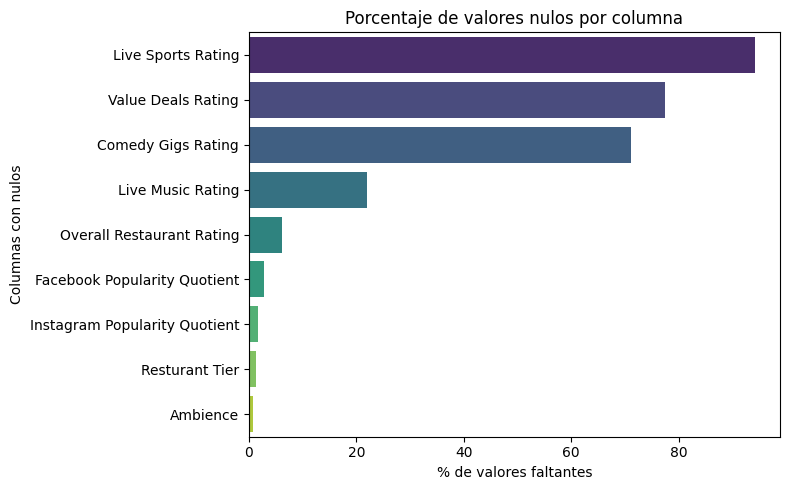

In [3]:
missing_pct = data.isnull().mean() * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

# Mostrar tabla de porcentajes de nulos
print("Porcentaje de valores nulos por columna:\n")
display(missing_pct.to_frame(name='% Nulos'))

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(
    x=missing_pct.values,
    y=missing_pct.index,
    palette="viridis"
)
plt.title("Porcentaje de valores nulos por columna")
plt.xlabel("% de valores faltantes")
plt.ylabel("Columnas con nulos")
plt.tight_layout()
plt.show()

In [4]:
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
print("Estadísticas descriptivas de variables numéricas:\n")
display(data[num_cols].describe().T)

Estadísticas descriptivas de variables numéricas:



count          mean           std        min  \
Registration Number            3493.0  6.174700e+04  1.008487e+03    60001.0   
Annual Turnover                3493.0  3.072571e+07  2.165125e+07  3500000.0   
Facebook Popularity Quotient   3394.0  7.793872e+01  9.829169e+00       43.0   
Instagram Popularity Quotient  3437.0  7.440468e+01  1.094033e+01       40.0   
Fire Audit                     3493.0  7.887203e-01  4.082748e-01        0.0   
Liquor License Obtained        3493.0  9.882622e-01  1.077187e-01        0.0   
Situated in a Multi Complex    3493.0  8.081878e-01  3.937825e-01        0.0   
Dedicated Parking              3493.0  8.018895e-01  3.986329e-01        0.0   
Open Sitting Available         3493.0  8.001718e-01  3.999284e-01        0.0   
Resturant Tier                 3444.0  1.926539e+00  2.609297e-01        1.0   
Restaurant Zomato Rating       3493.0  2.696536e+00  7.872713e-01        0.0   
Restaurant City Tier           3493.0  3.014601e-01  4.589577e-01        0.0   
Order Wait Time                3493.0  5.509591e+00  2.854476e+00        1.0   
Staff Responsivness            3493.0  4.538506e+00  1.093832e+00        1.0   
Value for Money                3493.0  4.526482e+00  9.139370e-01        1.0   
Hygiene Rating                 3493.0  4.661895e+00  1.259523e+00        1.0   
Food Rating                    3493.0  7.522760e+00  1.722721e+00        5.0   
Overall Restaurant Rating      3281.0  8.479427e+00  1.287233e+00        6.0   
Live Music Rating              2728.0  4.012830e+00  1.009044e+00        1.0   
Comedy Gigs Rating             1010.0  2.932673e+00  8.595190e-01        1.0   
Value Deals Rating              786.0  3.655216e+00  9.732496e-01        1.0   
Live Sports Rating              205.0  3.590244e+00  9.063515e-01        2.0   
Ambience                       3468.0  6.423010e+00  2.050026e+00        0.0   
Lively                         3493.0  6.874893e+00  1.847131e+00        0.0   
Service                        3493.0  4.546808e+00  1.877063e+00        0.0   
Comfortablility                3493.0  3.231320e+00  1.993050e+00        0.0   
Privacy                        3493.0  6.275122e+00  1.895057e+00        0.0   

                                      25%          50%           75%  \
Registration Number               60874.0     61747.00  6.262000e+04   
Annual Turnover                18000000.0  30000000.00  3.700000e+07   
Facebook Popularity Quotient         72.0        79.00  8.574500e+01   
Instagram Popularity Quotient        66.0        74.05  8.240000e+01   
Fire Audit                            1.0         1.00  1.000000e+00   
Liquor License Obtained               1.0         1.00  1.000000e+00   
Situated in a Multi Complex           1.0         1.00  1.000000e+00   
Dedicated Parking                     1.0         1.00  1.000000e+00   
Open Sitting Available                1.0         1.00  1.000000e+00   
Resturant Tier                        2.0         2.00  2.000000e+00   
Restaurant Zomato Rating              2.0         3.00  3.000000e+00   
Restaurant City Tier                  0.0         0.00  1.000000e+00   
Order Wait Time                       3.0         5.00  8.000000e+00   
Staff Responsivness                   4.0         5.00  5.000000e+00   
Value for Money                       4.0         5.00  5.000000e+00   
Hygiene Rating                        4.0         5.00  6.000000e+00   
Food Rating                           6.0         7.00  9.000000e+00   
Overall Restaurant Rating             7.0         9.00  1.000000e+01   
Live Music Rating                     3.0         4.00  5.000000e+00   
Comedy Gigs Rating                    2.0         3.00  3.000000e+00   
Value Deals Rating                    3.0         4.00  4.000000e+00   
Live Sports Rating                    3.0         4.00  4.000000e+00   
Ambience                              5.0         7.00  8.000000e+00   
Lively                                6.0         7.00  8.00000

De la tabla anterior podemos concluir que:
- Annual Turnover: Tiene una media de 30.7 Millones y una mediana de 30 Millones, esto muestra que hay una cercanía relativa de entre la media y la mediana, sin embargo la media es un poco mayor a la mediana por lo que nuestra variable tendrá un sesgo a al derecha. Además tendrá una cola de valores muy altos, posiblemente outliers.
- El annual turnover tiene una rango amplio, es decir, sus valores van desde 3.5 Millones a 400 millones, con una desviación estandar de 21.65 Millones, esto quiere decir que hay bastante dispersión en los datos.
- Por la parte de popularidad en redes (Facebook e Instagram), tienen medias similares Facebook 77.9 e instagram 74.4, también se puede visualizar que para facebook la mayoría de los datos están entre los 72 y los 97. Y para instagram los valores estan entre los 66 y 98 puntos. Lo que nos indica que la mayoría de los restaurantes tienen buena popularidad.
- El promedio de la calificación de la comida (Food Rating) es 7.52, lo que indica que hy muchos restaurantes con buena comida. La mayoría va de 6 a 10 puntos.
- Para las variables de Ambience, Lively, Service, Comfortability y privacy tienen un promedio de alrededor de 6 para Ambience, Lively y Privacy. Por otro lado, Service y Comfortability, tiene una calificación promedio de 4.5 y 3.23. Lo que indica que la mayoría de los restaurantes tienen una calificación media. Encontraremos algunas colas con restaurantes con calificaciones latas y otros con calificaciones bajas.

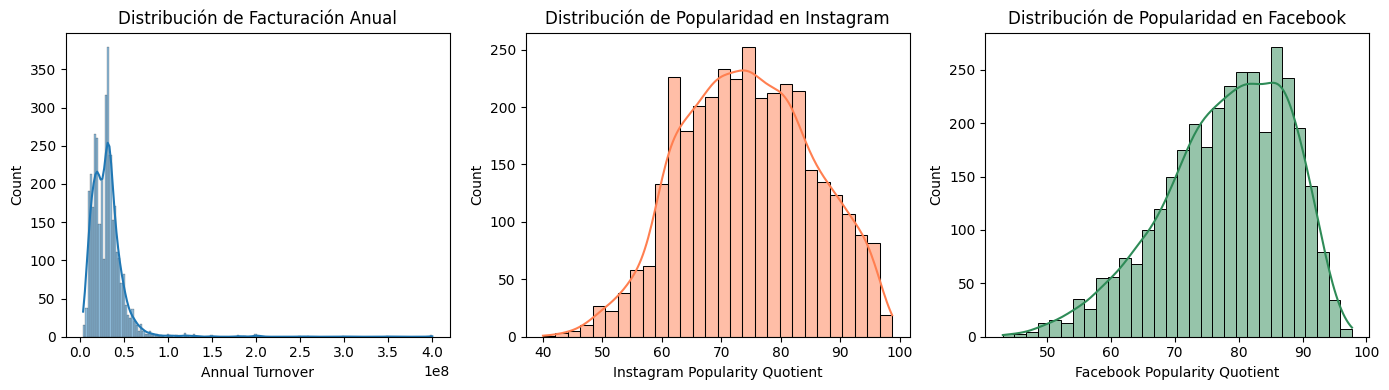

In [5]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.histplot(data['Annual Turnover'], kde=True)
plt.title("Distribución de Facturación Anual")
plt.xlabel("Annual Turnover")

plt.subplot(1, 3, 2)
sns.histplot(data['Instagram Popularity Quotient'], kde=True, color='coral')
plt.title("Distribución de Popularidad en Instagram")
plt.xlabel("Instagram Popularity Quotient")

plt.subplot(1, 3, 3)
sns.histplot(data['Facebook Popularity Quotient'], kde=True, color='seagreen')
plt.title("Distribución de Popularidad en Facebook")
plt.xlabel("Facebook Popularity Quotient")

plt.tight_layout()
plt.show()

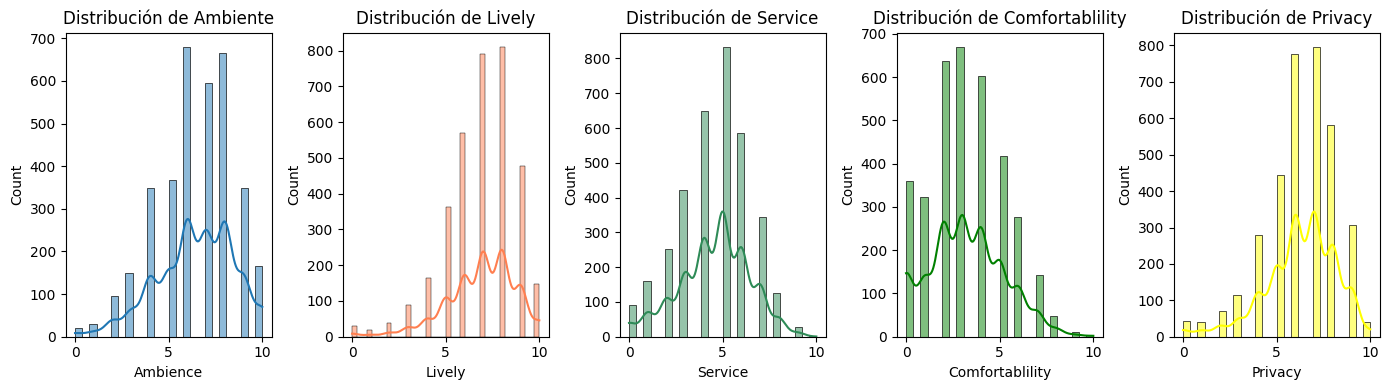

In [6]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 5, 1)
sns.histplot(data['Ambience'], kde=True)
plt.title("Distribución de Ambiente")
plt.xlabel("Ambience")

plt.subplot(1, 5, 2)
sns.histplot(data['Lively'], kde=True, color='coral')
plt.title("Distribución de Lively")
plt.xlabel("Lively")

plt.subplot(1, 5, 3)
sns.histplot(data['Service'], kde=True, color='seagreen')
plt.title("Distribución de Service")
plt.xlabel("Service")

plt.subplot(1, 5, 4)
sns.histplot(data['Comfortablility'], kde=True, color='green')
plt.title("Distribución de Comfortablility")
plt.xlabel("Comfortablility")

plt.subplot(1, 5, 5)
sns.histplot(data['Privacy'], kde=True, color='yellow')
plt.title("Distribución de Privacy")
plt.xlabel("Privacy")

plt.tight_layout()
plt.show()

In [7]:
data['Live Sports Rating_missing'] = data['Live Sports Rating'].fillna(data['Live Sports Rating'].median())
data['Value Deals Rating_missing'] = data['Value Deals Rating'].fillna(data['Value Deals Rating'].median())
data['Comedy Gigs Rating_missing'] = data['Comedy Gigs Rating'].fillna(data['Comedy Gigs Rating'].median())
data['Live Music Rating_missing'] = data['Live Music Rating'].fillna(data['Live Music Rating'].median())


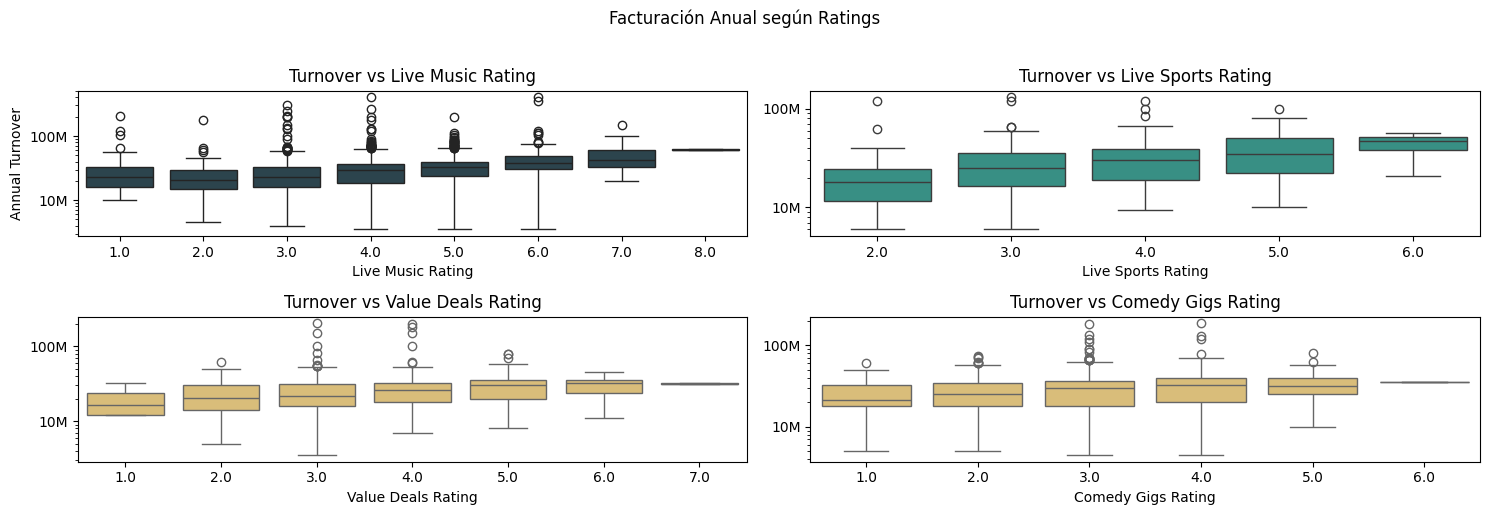

In [8]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    """Formatea el tick x como '10M', '50M', etc."""
    return f'{int(x/1e6)}M'
    
metrics = ['Live Music Rating','Live Sports Rating', 'Value Deals Rating', 'Comedy Gigs Rating']
colors = ['#264653', '#2a9d8f', '#e9c46a', '#e9c46a']

plt.figure(figsize=(15, 5))

for i, (metric, color) in enumerate(zip(metrics, colors), 1):
    ax = plt.subplot(2, 2, i)
    sns.boxplot(
        data=data,
        x=metric,
        y='Annual Turnover',
        color=color
    )
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(FuncFormatter(millions))
    ax.set_xlabel(metric)
    if i == 1:
        ax.set_ylabel('Annual Turnover')
    else:
        ax.set_ylabel('')
    ax.set_title(f'Turnover vs {metric}')

plt.suptitle('Facturación Anual según Ratings', y=1.02)
plt.tight_layout()
plt.show()

- A medida que sube el rating de música en vivo (de 1 a 8), la mediana de facturación anual tiende a crecer.
- Similarmente, un mejor rating de transmisiones deportivas va ligado a medianas crecientes en la facturación anual.
- Hay algo particular con las promociones o el rating de los deals, pues alcanzan un tope hasta 4 de crecimeinto y luego comienza a reducirse.

In [9]:
import plotly.io as pio
pio.renderers.default = "notebook" 
top_cities = data['City'].value_counts().nlargest(20).reset_index()
top_cities.columns = ['City', 'Count']
fig1 = px.bar(
    top_cities,
    x='Count',
    y='City',
    orientation='h',
    title='Top 20 Ciudades con más Restaurantes',
    labels={'Count': 'Cantidad de Restaurantes', 'City': 'Ciudad'}
)
fig1.update_layout(
    yaxis=dict(categoryorder='total ascending'),
    margin=dict(l=100, r=20, t=50, b=50)
)
fig1.show()

En la gráfica anterior, se pueden visualizar las 10 ciudades con mayor número de restaurantes, podemos visualizar algo extraño hay un -1 en la categoría de ciudades, probablemente debe de ser como un "NULL" y lo vamos a limipiar más adelante.

<Figure size 1200x800 with 0 Axes>

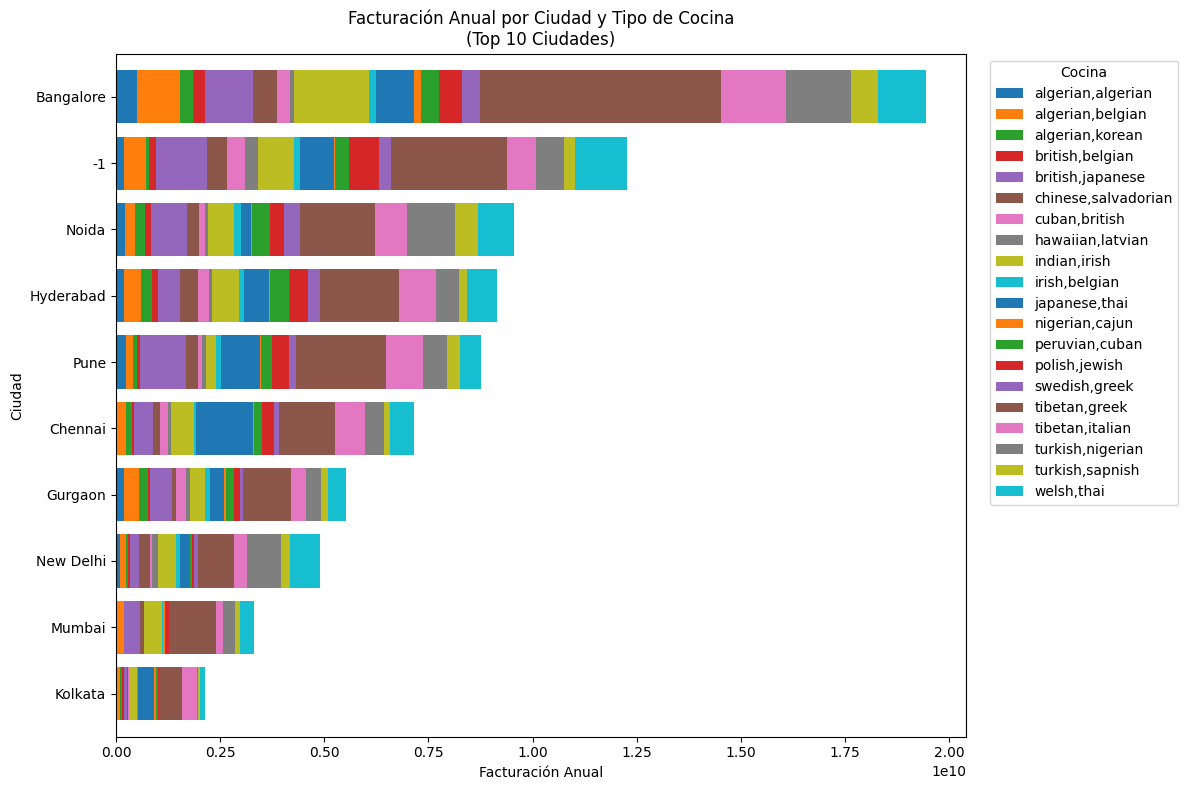

In [10]:
group = (
    data
    .groupby(['City', 'Cuisine'])['Annual Turnover']
    .sum()
    .reset_index()
)

top_cities = (
    data
    .groupby('City')['Annual Turnover']
    .sum()
    .nlargest(10)
    .index
)

group_top = group[group['City'].isin(top_cities)]

pivot = (
    group_top
    .pivot(index='City', columns='Cuisine', values='Annual Turnover')
    .fillna(0)
    .loc[top_cities]
)

plt.figure(figsize=(12, 8))
pivot.plot(
    kind='barh',
    stacked=True,
    width=0.8,
    figsize=(12,8),
    legend=True
)

plt.title('Facturación Anual por Ciudad y Tipo de Cocina\n(Top 10 Ciudades)')
plt.xlabel('Facturación Anual')
plt.ylabel('Ciudad')
plt.gca().invert_yaxis()

plt.legend(
    title='Cocina',
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

In [11]:
freq_df = (
    data['City']
    .value_counts()
    .rename_axis('value')
    .reset_index(name='count')
)
freq_df[freq_df['count']>20]

value  count
0       Bangalore    553
1              -1    396
2           Noida    324
3       Hyderabad    295
4            Pune    262
5         Chennai    244
6       New Delhi    176
7         Gurgaon    174
8          Mumbai     90
9         Kolkata     88
10         Jaipur     36
11         Mysore     32
12        Lucknow     28
13        chennai     27
14  Greater Noida     24
15           pune     23
16    Navi Mumbai     22
17         Indore     21
18     Chandigarh     21

Hay muchas ciudades que aparecen pocas veces en el dataset, podrían no aportar mucha información así que se más adelante se hará una reducción del número de ciudades

<Figure size 1000x600 with 0 Axes>

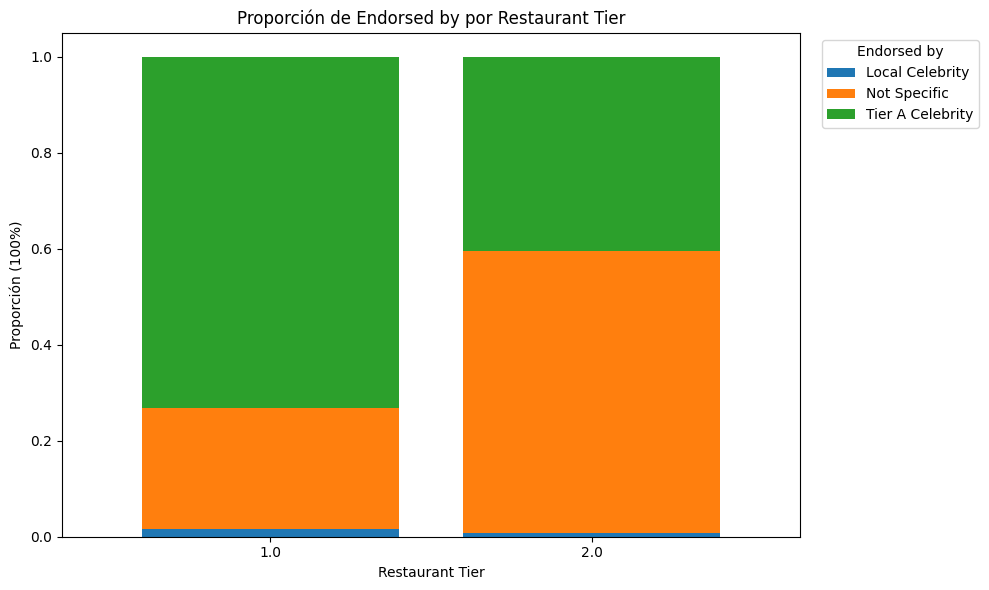

In [12]:
prop = pd.crosstab(
    data['Resturant Tier'],
    data['Endorsed By'],
    normalize='index'
)

plt.figure(figsize=(10,6))
prop.plot(
    kind='bar',
    stacked=True,
    width=0.8,
    figsize=(10,6)
)

plt.title('Proporción de Endorsed by por Restaurant Tier')
plt.xlabel('Restaurant Tier')
plt.ylabel('Proporción (100%)')
plt.legend(
    title='Endorsed by',
    bbox_to_anchor=(1.02,1),
    loc='upper left'
)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Del gráfico anterior podemos concluir que los restaurantes de Tier 1.0 llaman mucho más la atención de las celebridades. Mientras que los restaurantes de Tier 2, tal vez por la falta de recursos optan por avales de otro tipo de público.

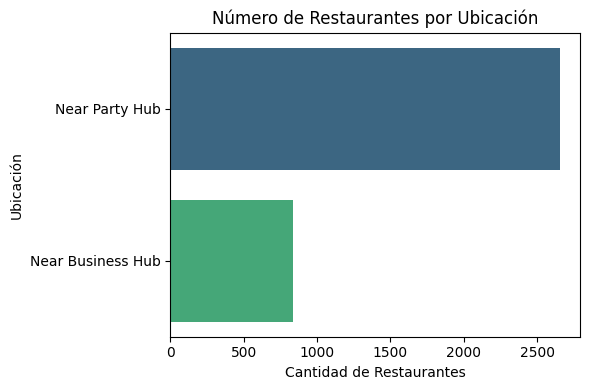

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=data,
    y='Restaurant Location',
    order=data['Restaurant Location'].value_counts().index,
    palette='viridis'
)
plt.title('Número de Restaurantes por Ubicación')
plt.xlabel('Cantidad de Restaurantes')
plt.ylabel('Ubicación')
plt.tight_layout()
plt.show()

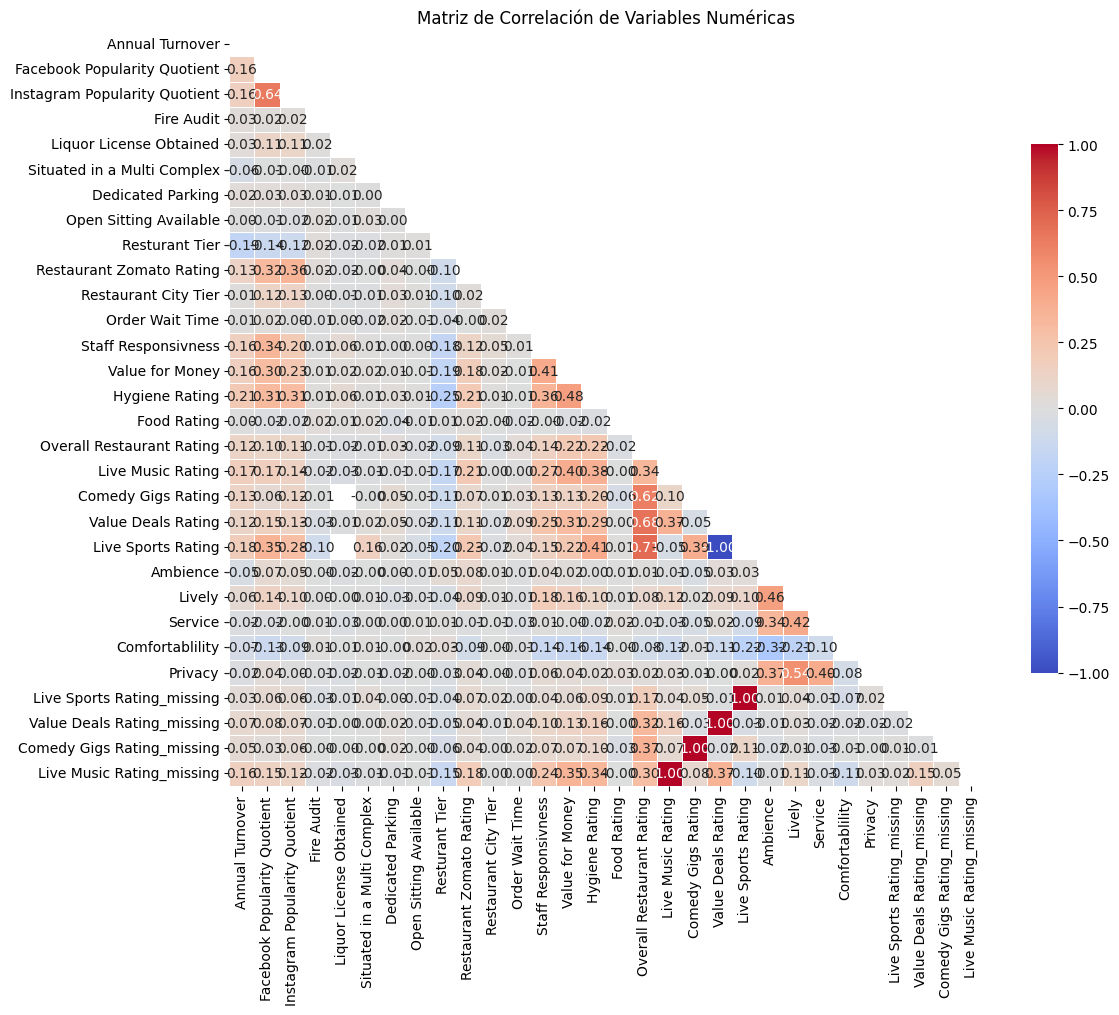

In [14]:
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
if 'Registration Number' in num_cols:
    num_cols.remove('Registration Number')

corr = data[num_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": .7},
    square=True
)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

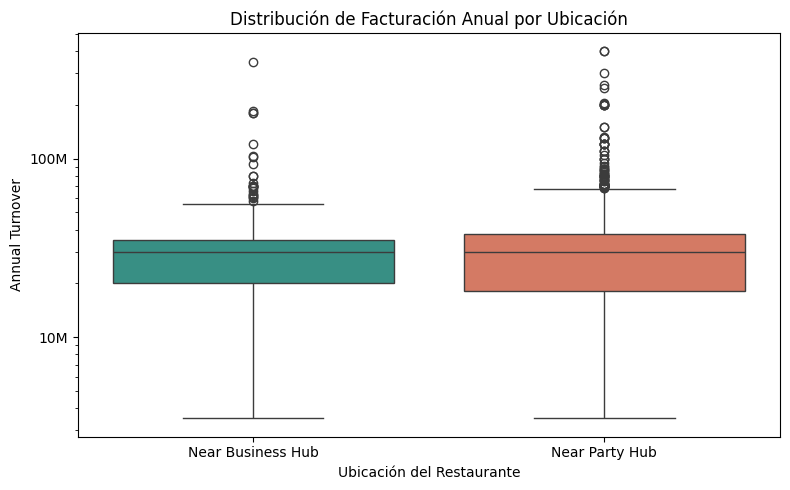

In [15]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    """Formatea el tick x como '10M', '50M', etc."""
    return f'{int(x/1e6)}M'

plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=data,
    x='Restaurant Location',
    y='Annual Turnover',
    palette=['#2a9d8f','#e76f51']
)

ax.set_yscale('log')
ax.yaxis.set_major_formatter(FuncFormatter(millions))

plt.title('Distribución de Facturación Anual por Ubicación')
plt.xlabel('Ubicación del Restaurante')
plt.ylabel('Annual Turnover')
plt.tight_layout()
plt.show()

- Ambas categorías tiene medianas bastante similares. Sin embargo, por parte de los restaurantes cercanos a los Hub de fiesta tiene una mediana un poco mayor. El rango intercuartílico para ambos es bastante similar, rondando alrededor de 20 Millones a 40 Millones.
- Por el lado de los outliers, para los lugares cercanos a Hubs de fiestas hay mayor cantidad de outliers, lo que indica que los lugares cercanos a Party Hub pueden tener mayor facturación con mayor frecuencia. Esto también lo podemos ver por el lado de los bigotes, el extremo de Near Party Hub, es un poco mayor comparado con Near Business Hub.
- Esto puede indicar que la ubicación por sí sola no cambia drásticamente la facturación típica, aunque los Party Hubs tienen un poco más de casos de éxitos o de mayor facturación.

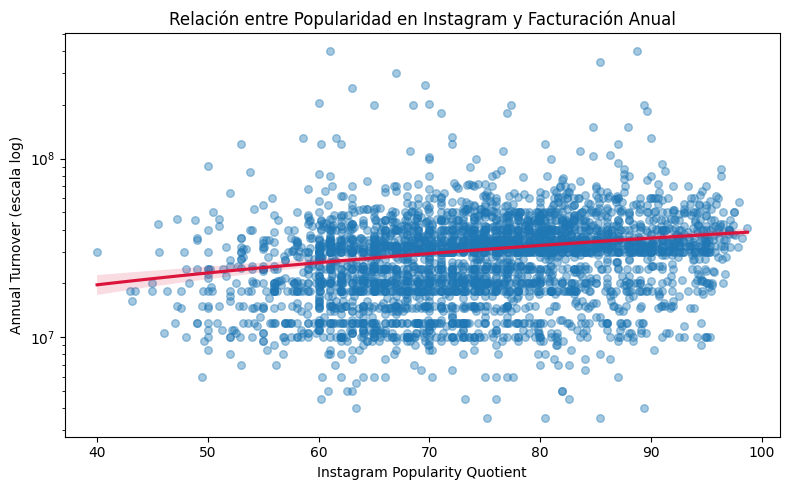

In [16]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=data,
    x='Instagram Popularity Quotient',
    y='Annual Turnover',
    scatter_kws={'alpha':0.4, 's':30},
    line_kws={'color':'crimson'}
)
plt.yscale('log') 
plt.title('Relación entre Popularidad en Instagram y Facturación Anual')
plt.xlabel('Instagram Popularity Quotient')
plt.ylabel('Annual Turnover (escala log)')
plt.tight_layout()
plt.show()

De la gráfica anterior podemos concluir que hay una relación positiva entre la popularidad en instagram y la facturación Anual. Sin embargo, debido a la dispersión de los puntos podemos decir que la relación es débil, pues hay restaurantes con popularidades similares pero con facturaciones diferentes. 

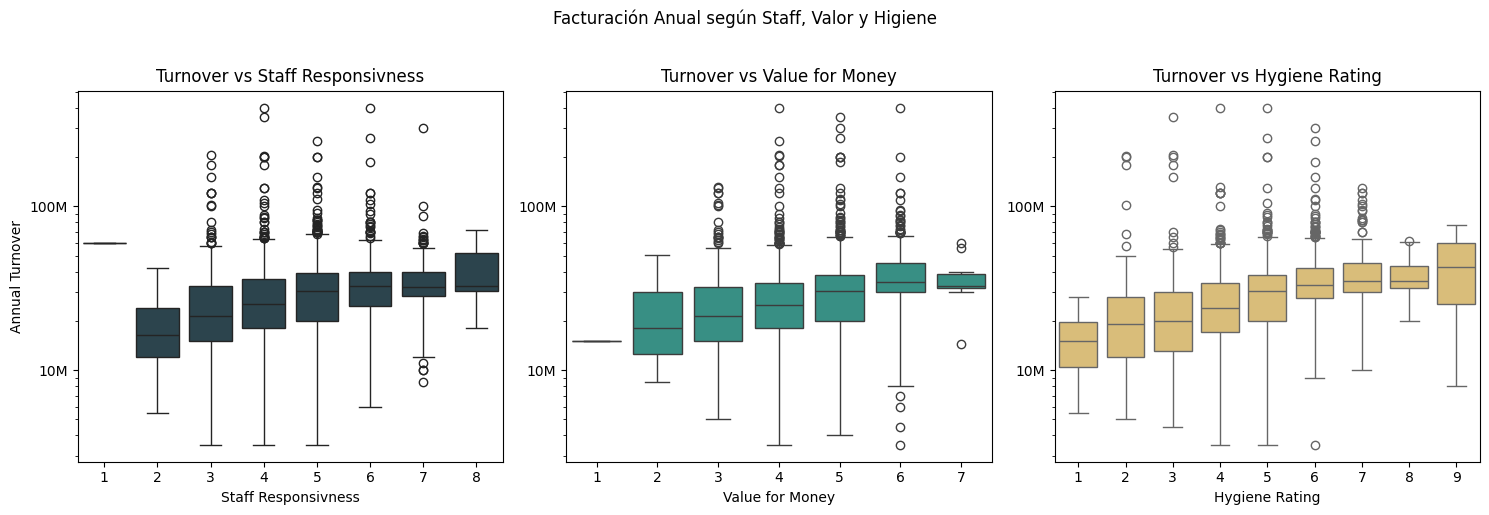

In [17]:
metrics = ['Staff Responsivness', 'Value for Money', 'Hygiene Rating']
colors = ['#264653', '#2a9d8f', '#e9c46a']

plt.figure(figsize=(15, 5))

for i, (metric, color) in enumerate(zip(metrics, colors), 1):
    ax = plt.subplot(1, 3, i)
    sns.boxplot(
        data=data,
        x=metric,
        y='Annual Turnover',
        color=color  # aquí asignamos el color directamente
    )
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(FuncFormatter(millions))
    ax.set_xlabel(metric)
    if i == 1:
        ax.set_ylabel('Annual Turnover')
    else:
        ax.set_ylabel('')
    ax.set_title(f'Turnover vs {metric}')

plt.suptitle('Facturación Anual según Staff, Valor y Higiene', y=1.02)
plt.tight_layout()
plt.show()

- Staff Responsiviness:
- Los restaurantes con calificación de 2 a 3 tienen una facturación alrededor de los 15 a 17 Millones.
- En los valores intermedios (calificación de 4 a 5) tiene facturaciones más altas entre los 25 y 35 millones.
- Lo mejores rangos de facturación se pueden apreciar en entre los 6 y los 8 puntos. Por lo cual, podemos decir que un mejor servicio es sinónimo de ingresos más alto y esto es mucho más visible en los rangos más altos como las puntuaciones de 6, 7 y 8.

- Value for money:
- Tiene un comportamiento similar con Staff Responsiviness, pero el aumento de la facturación es mucho más evidente en valores altos de puntuación. El aumento de la facturación es muy marcado para puntuaciones bajas y puntuaciones altas. Para puntuaciones bajas la factuarción puede ser menor a 15 millones pero para puntuaciones altas la facturación mejora notablemente.
- Entre mejor valor perciben los clientes, mayor facturación va a haber.

- Hygiene:
- En esta parte creo que es bastante marcado que si hay un excelente higine la facturación va a aumentar drásticamente y esto se puede visualizar en los puntos más altos de calificación (7,8 y 9) y por otro lado restaurantes con calificaciones bajas la facturaciones son notablemente bajas, menor a apróximandamente a 15 Millones.

Text(0, 0.5, 'Annual Turnover')

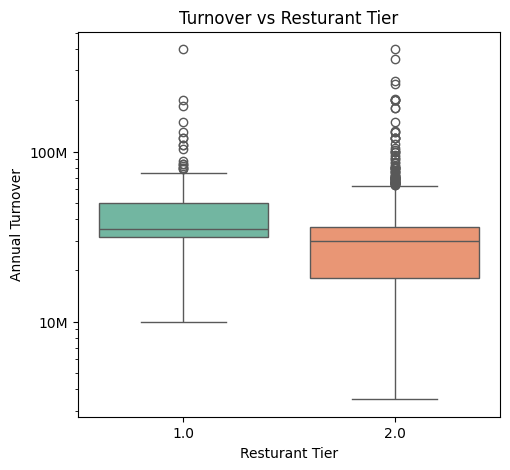

In [18]:
plt.figure(figsize=(12, 5))

# Resturant Tier
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(
    data=data,
    x='Resturant Tier',
    y='Annual Turnover',
    palette='Set2'
)
ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(FuncFormatter(millions))
ax1.set_title('Turnover vs Resturant Tier')
ax1.set_xlabel('Resturant Tier')
ax1.set_ylabel('Annual Turnover')

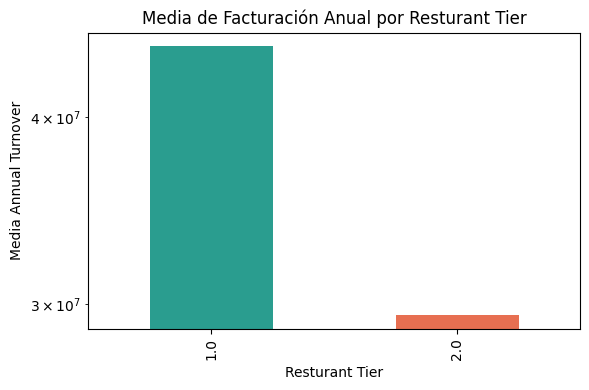

In [19]:
means = data.groupby('Resturant Tier')['Annual Turnover'].mean()

ax = means.plot(
    kind='bar',
    logy=True,
    figsize=(6, 4),
    color=['#2a9d8f', '#e76f51']
)

ax.yaxis.set_major_formatter(lambda x, _: f"{int(x/1e6)}M")

plt.title('Media de Facturación Anual por Resturant Tier')
plt.xlabel('Resturant Tier')
plt.ylabel('Media Annual Turnover')
plt.tight_layout()
plt.show()

Del boxplot podemos concluir:
- La media de los restaurantes Tier 1 esta en aproximadamente 45 millones mientras que la de Tier 2.0 esta en alrededor de 27 a 30 millones. Esto lo podemos confirmar con el bar plot que los restaurantes Tier 1 tienen mayor facturación que los restaurantes Tier 2.
- Esto confirma que la categoría del establecimiento es un factor determinante para alcanzar una facturación anual más alta.

Text(0, 0.5, 'Annual Turnover')

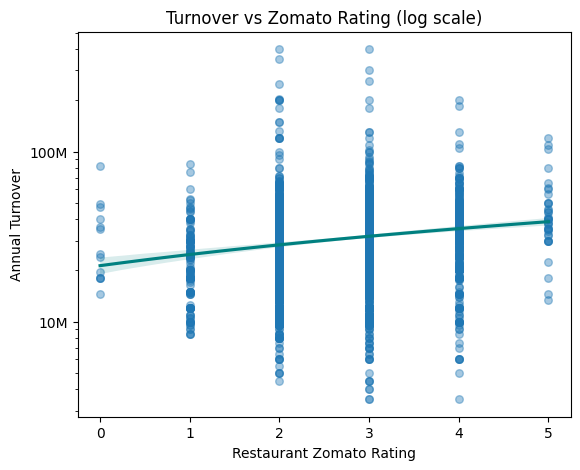

In [20]:
def fmt_millions(x, pos):
    return f'{int(x/1e6)}M'

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.regplot(
    data=data,
    x='Restaurant Zomato Rating',
    y='Annual Turnover',
    scatter_kws={'alpha':0.4, 's':30},
    line_kws={'color':'teal'}
)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(fmt_millions))
plt.title('Turnover vs Zomato Rating (log scale)')
plt.xlabel('Restaurant Zomato Rating')
plt.ylabel('Annual Turnover')

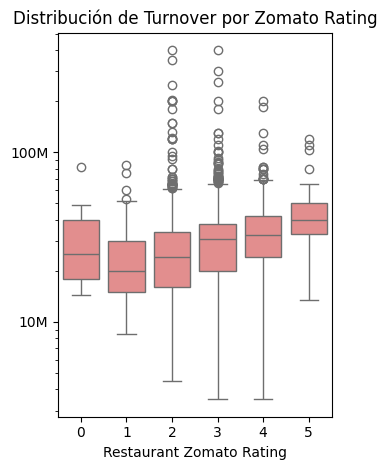

In [21]:
plt.subplot(1, 2, 2)
sns.boxplot(
    data=data,
    x='Restaurant Zomato Rating',
    y='Annual Turnover',
    color='lightcoral'
)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(fmt_millions))
plt.title('Distribución de Turnover por Zomato Rating')
plt.xlabel('Restaurant Zomato Rating')
plt.ylabel('')

plt.tight_layout()
plt.show()

- La línea de regresión del scatterplot muestra que, a medida que aumenta el Restaurant Zomato Rating de 0 a 5, la facturación anual tiende a subir.
- Hay un punto extraño con la calificación 0, que tiene una facturación por encima de 15 millones debido a que no tiene muchos samples o muestras pertenecientes a este valor.
- En todos los niveles de calificación hay outliers con facturaciones muy elevadas lo que podría indicar que restaurantes con facturaciones bajas o medias podrían tener altas facturaciones. Sin embargo, la tendencia es a la alza.

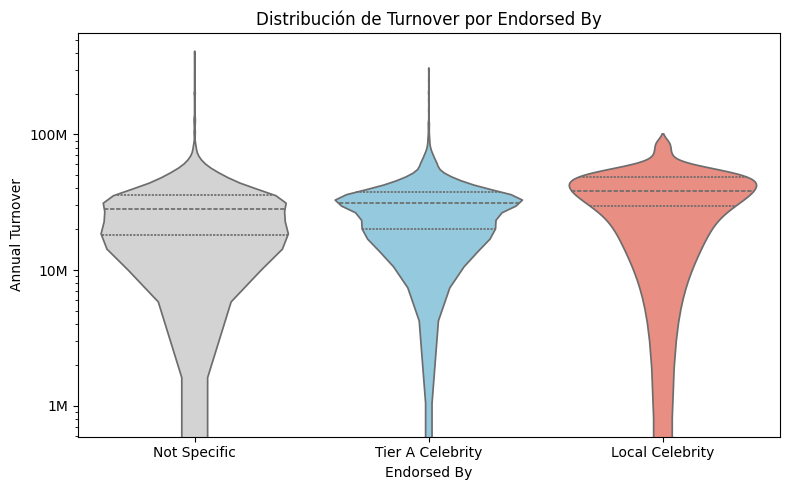

In [22]:
plt.figure(figsize=(8, 5))
ax = sns.violinplot(
    data=data,
    x='Endorsed By',
    y='Annual Turnover',
    order=['Not Specific', 'Tier A Celebrity', 'Local Celebrity'],
    palette=['lightgray','skyblue','salmon'],
    scale='count',
    inner='quartile',
)
ax.set_yscale('log')
ax.yaxis.set_major_formatter(FuncFormatter(fmt_millions))
ax.set_title('Distribución de Turnover por Endorsed By')
ax.set_xlabel('Endorsed By')
ax.set_ylabel('Annual Turnover')
plt.tight_layout()
plt.show()

- Not Specific:
- Esta categoría tiene la mediana más baja de todos.
- La distribución es más estrecha por loq ue no hay tantos valores extremos o outliers.
- Restaurantes sin respaldo tiene menor variabilidad y además menor facturación.
- Tier A Celerity:
- Esta categoría tiene una mediana más alta que la de Not Specific lo que indica que que los ingresos anuales aumentan.
- Local Celebrity:
- Tiene la mediana más alta de todas, lo que indica que restaurantes con respaldo de celebridades locales pueden tener mayor facturación comparados con los demás.
- En conclusión los restaurantes respaldados por celebridades tendrán uan facturación más alta.

Top 10 cocinas más frecuentes:


Count
tibetan     964
greek       778
thai        549
japanese    475
british     392
turkish     372
irish       358
welsh       345
algerian    305
belgian     280

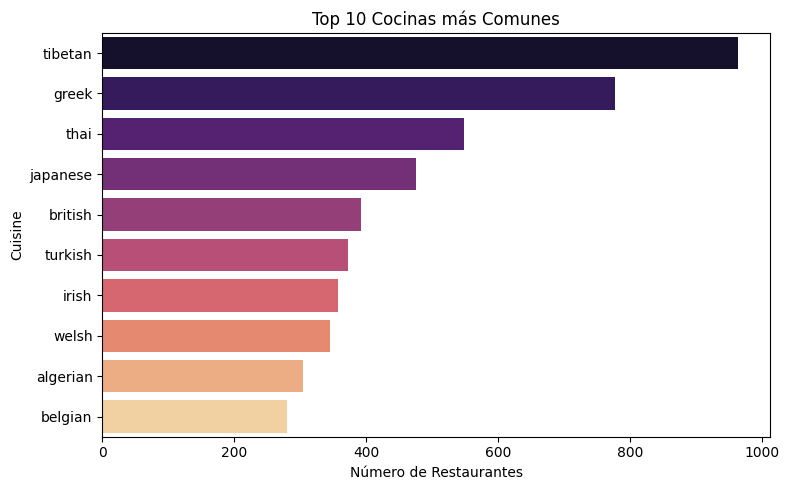

In [23]:
data_copy = data.copy()
cuisine_dummies = data_copy['Cuisine'].str.get_dummies(sep=',')
df_c = pd.concat([data_copy, cuisine_dummies], axis=1)
df_c['Num_Cuisines'] = data_copy['Cuisine'].str.count(',').fillna(0).astype(int) + 1
top_cuisines = cuisine_dummies.sum().sort_values(ascending=False).head(10)
print("Top 10 cocinas más frecuentes:")
display(top_cuisines.to_frame(name='Count'))
plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_cuisines.values,
    y=top_cuisines.index,
    palette='magma'
)
plt.title('Top 10 Cocinas más Comunes')
plt.xlabel('Número de Restaurantes')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

Top cocinas por facturación anual promedio:


Avg Annual Turnover
hawaiian            3.967391e+07
latvian             3.967391e+07
nigerian            3.408635e+07
tibetan             3.332158e+07
greek               3.329949e+07
jewish              3.276838e+07
polish              3.276838e+07
japanese            3.253053e+07
indian              3.215934e+07
turkish             3.160484e+07
italian             3.133813e+07
british             3.003189e+07
irish               2.994832e+07
algerian            2.944426e+07
thai                2.912386e+07
korean              2.907831e+07
peruvian            2.784783e+07
belgian             2.746071e+07
swedish             2.714130e+07
cuban               2.713010e+07
cajun               2.700000e+07
sapnish             2.664966e+07
welsh               2.600725e+07
chinese             2.500629e+07
salvadorian         2.500629e+07

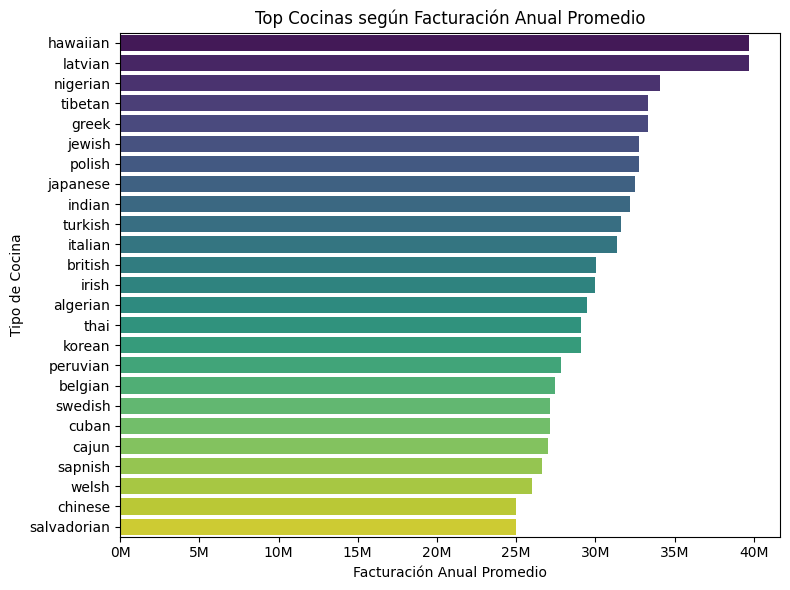

In [24]:
cuisine_cols = cuisine_dummies.columns.tolist()
mean_turnover_by_cuisine = {
    cuisine: df_c.loc[df_c[cuisine] == 1, 'Annual Turnover'].mean()
    for cuisine in cuisine_cols
}
mean_turnover_by_cuisine = pd.Series(mean_turnover_by_cuisine).sort_values(ascending=False)

top10_avg = mean_turnover_by_cuisine.head(25)
print("Top cocinas por facturación anual promedio:")
display(top10_avg.to_frame(name='Avg Annual Turnover'))

plt.figure(figsize=(8, 6))
sns.barplot(
    x=top10_avg.values,
    y=top10_avg.index,
    palette='viridis'
)
plt.title('Top Cocinas según Facturación Anual Promedio')
plt.xlabel('Facturación Anual Promedio')
plt.ylabel('Tipo de Cocina')
plt.gca().xaxis.set_major_formatter(FuncFormatter(fmt_millions))
plt.tight_layout()
plt.show()

La lista de cocinas de cocinas más comunes muestra las 10 cocinas más comunes, entre ellas las dos primeras son la cocina tibetana y la griega. Sin embargo, cuando venimos a la facturación promedio generada por cada tipo de cocina vemos que cocinas como Hawaiian y Latvian lideran el ranking. Por lo que ofrecer tipos de cocinas un poco más exóticas podría ser diferencial para aumentar la facturación.

In [25]:
data['Registration Date'] = pd.to_datetime(data['Opening Day of Restaurant'])
data['Years_Open'] = (pd.Timestamp.today() - data['Registration Date']).dt.days / 365

<Axes: xlabel='Years_Open', ylabel='Annual Turnover'>

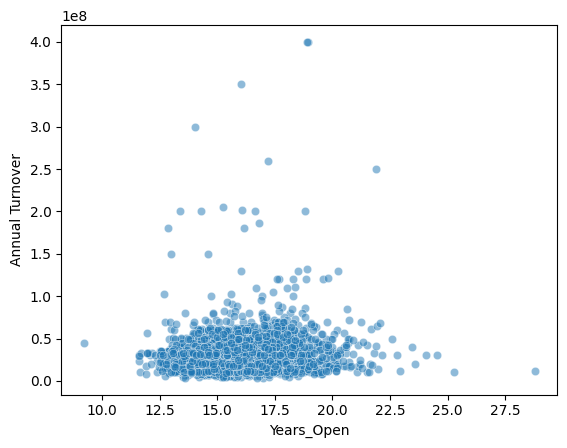

In [26]:
sns.scatterplot(data=data, x='Years_Open', y='Annual Turnover', alpha=0.5)

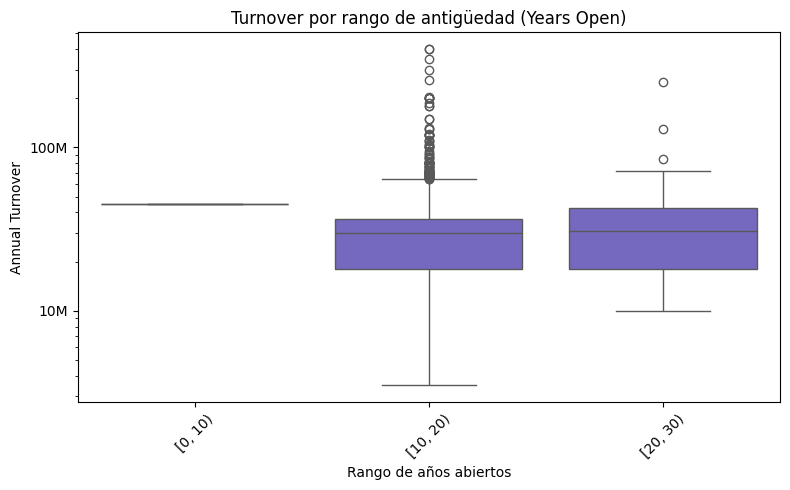

In [27]:
data['Age_Bin'] = pd.cut(data['Years_Open'], bins=range(0, 35, 10), right=False)
plt.figure(figsize=(8,5))
sns.boxplot(
    data=data,
    x='Age_Bin',
    y='Annual Turnover',
    color='slateblue'
)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1e6)}M"))
plt.xticks(rotation=45)
plt.xlabel('Rango de años abiertos')
plt.ylabel('Annual Turnover')
plt.title('Turnover por rango de antigüedad (Years Open)')
plt.tight_layout()
plt.show()

Del boxplot anterior podemos visualizar que los restaurantes con más de 20 años de antiguedad pueden generar un mayor retorno, sin emabgo no es muy alta. También podemos ver que hay almacénes jóvenes que generan mucho dinero, por lo que la antiguedad no asegura que la facturación aumente.

<Figure size 800x600 with 0 Axes>

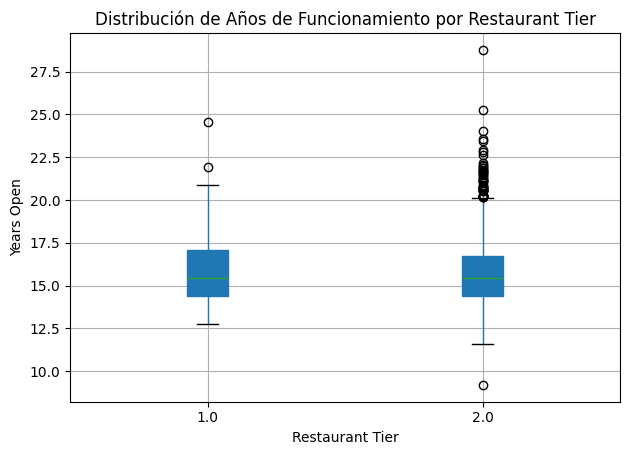

In [28]:
plt.figure(figsize=(8, 6))

data.boxplot(
    column='Years_Open',
    by='Resturant Tier',
    grid=True,
    showfliers=True,
    patch_artist=True
)

plt.title('Distribución de Años de Funcionamiento por Restaurant Tier')
plt.suptitle('')
plt.xlabel('Restaurant Tier')
plt.ylabel('Years Open')

plt.tight_layout()
plt.show()

Las medianas son muy similares, sin embargo, el Tier 2.0 muestra una mayor dispersión, mientras que el Tier 1.0 es mucho más compacto en su rango intercuartílico. Lo que nos podría indicar que los restaurantes necesitan haber pasado una madurez mínima, mientras que un restaurante tier 2.0 puede ser un restaurante nuevo o un restaurante viejo.

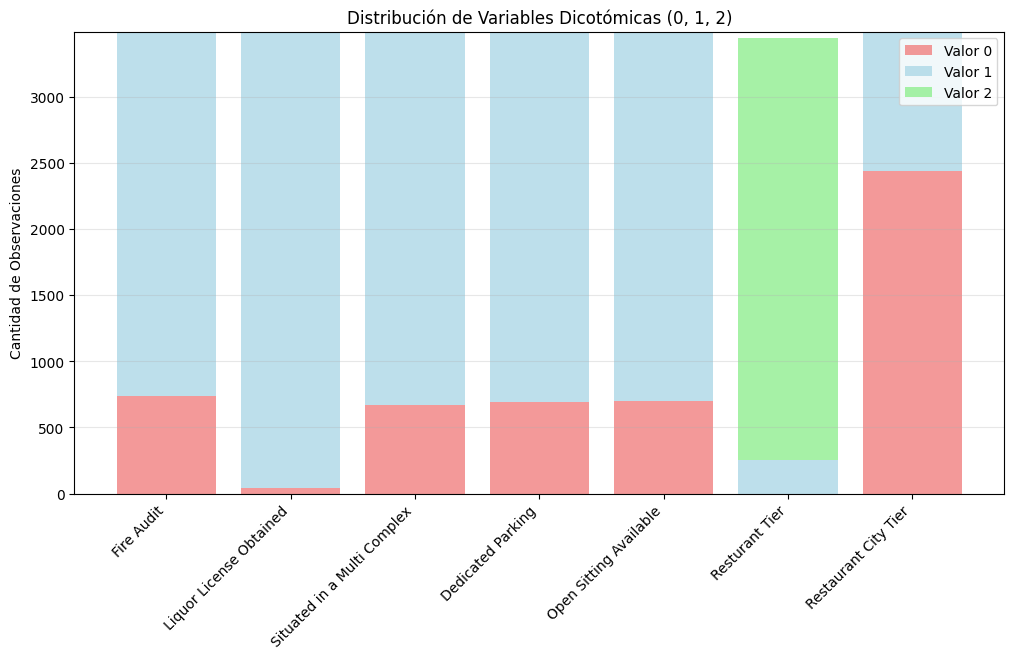

In [29]:
df_dic = data.select_dtypes(include=['int64', 'float64']).loc[:, lambda x: x.nunique() < 3]

datos_apilados = []
for col in df_dic.columns:
    conteos = df_dic[col].value_counts().sort_index()
    datos_apilados.append({
        'Variable': col,
        'Valor_0': conteos.get(0, 0),
        'Valor_1': conteos.get(1, 0),
        'Valor_2': conteos.get(2, 0)

    })

plot_data = pd.DataFrame(datos_apilados)
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = range(len(plot_data))

bars1 = ax.bar(x_pos, plot_data['Valor_0'], label='Valor 0', color='lightcoral', alpha=0.8)
bars2 = ax.bar(x_pos, plot_data['Valor_1'], bottom=plot_data['Valor_0'],
                label='Valor 1', color='lightblue', alpha=0.8)
bars3 = ax.bar(x_pos, plot_data['Valor_2'],
                bottom=plot_data['Valor_0'] + plot_data['Valor_1'],
                label='Valor 2', color='lightgreen', alpha=0.8)

ax.set_ylabel('Cantidad de Observaciones')

ax.set_title('Distribución de Variables Dicotómicas (0, 1, 2)')

ax.set_xticks(x_pos)

ax.set_xticklabels(plot_data['Variable'], rotation=45, ha='right')

ax.legend()

ax.grid(True, alpha=0.3, axis='y')

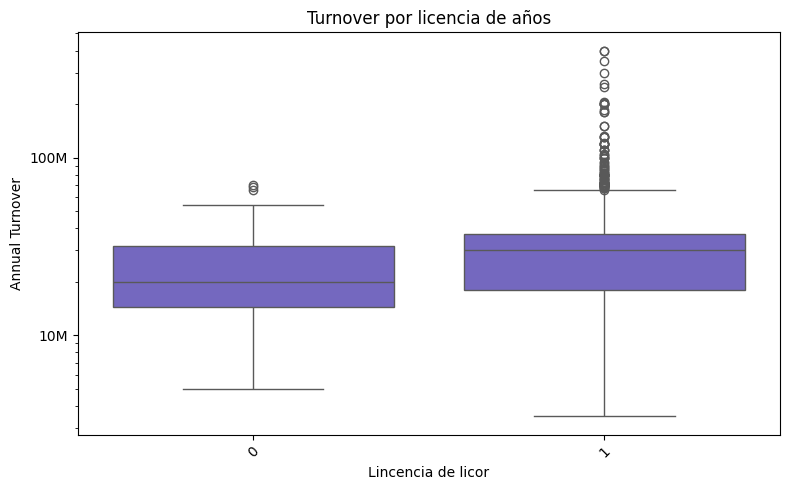

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=data,
    x='Liquor License Obtained',
    y='Annual Turnover',
    color='slateblue'
)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1e6)}M"))
plt.xticks(rotation=45)
plt.xlabel('Lincencia de licor')
plt.ylabel('Annual Turnover')
plt.title('Turnover por licencia de años')
plt.tight_layout()
plt.show()

La mediana de los restaurantes que tienen permiso para vender licor es mayor que la de los restaurantes que no tienen permiso. Esto tiene todo el sentido debido a que el licor puede ser bastante costoso cuando uno va a consumir alguna comida.

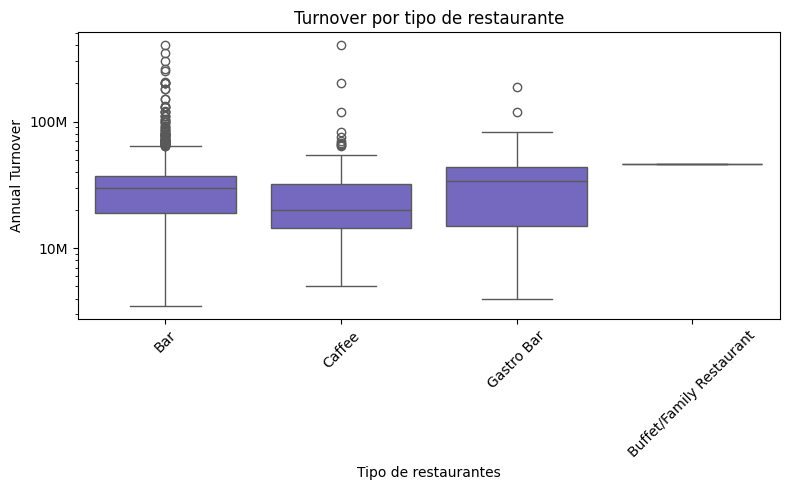

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=data,
    x='Restaurant Type',
    y='Annual Turnover',
    color='slateblue'
)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1e6)}M"))
plt.xticks(rotation=45)
plt.xlabel('Tipo de restaurantes')
plt.ylabel('Annual Turnover')
plt.title('Turnover por tipo de restaurante')
plt.tight_layout()
plt.show()

- Los Gastro Bar tienen la mediana más alta: la facturación anual supera la de los caffee y la de los bares
- Las Coffee shops muestran la mediana más baja, lo que indica que, en general, facturan menos que los demás formatos.
- Los Bar y los Gastro Bar presentan un rango intercuartílico (IQR) más amplio, señal de mayor variabilidad entre locales de esos tipos.
- Las Coffee tienen un IQR más estrecho lo que quiere decir que su facturación es más homogénea
- La categoría bar es la que más outliers tiene lo que quiere decir que hay establecimientos con facturaciones anuales muy altas, es decir que pueden destacar mucho o también pueden tener facturaciones muy bajas.

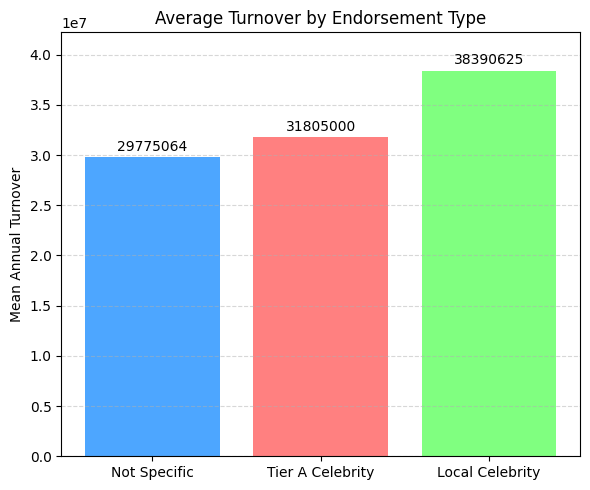

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

means = (
    data
    .groupby('Endorsed By')['Annual Turnover']
    .mean()
    .reindex(['Not Specific','Tier A Celebrity','Local Celebrity'])
)

fig, ax = plt.subplots(figsize=(6,5))

colors = ['#4da6ff', '#ff8080', '#80ff80']

bars = ax.bar(
    means.index,
    means.values,
    color=colors,
    edgecolor='none'
)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height + height*0.01,             
        f"{height:.0f}",                   
        ha='center',
        va='bottom',
        fontsize=10
    )

ax.set_title('Average Turnover by Endorsement Type')
ax.set_ylabel('Mean Annual Turnover')
ax.set_ylim(0, means.max() * 1.1) 
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# Conclusiones

- Es claro que los restaurantes endorzados tienen una mayor facturación anual, los restaurantes endorzados por una celebridad tienen una media de 31805000, una media mayor a los resturantes que no tienen un endorzamiento específico. Sin embargo, los restaurantes por celebridades locales, tienen la media más alta demostrando que los restaurantes endorzados por celebridades locales tiene una media de 38390625 millones de facturación anual. Esto puede evidenciar que las personas son más influenciables o siguen más a celebridades locales que otro tipo de celebridades.
- Los restaurantes con licencia para vender licor tienen una mediana de alrededor de 30 millones, mucho más alta que los establecimientos que no tienen licencia para vender licor que tiene una mediana de alrededor 20 millones. Lo cual tiene mucho sentido debido a que si verificamos la facturación del gastro bar, son las mas altas de los tipos de restaurantes, esto debido a la combinación de vender comida con licor.
- La cantiadad de años abierto no garantiza el éxito financiero o una gran facturación anual, hay resturantes muy jóvenes o que llevan muy poco en el mercado y tienen facturaciones mayores a los que llevan más años. Por otro lado, podemos identificar dos tiers de restaurantes Tier 1 que son como lso más luxury y el Tier 2, cuando sacamos la media de facturación anual por tier, los resturantes Tier 1 venden alrededor de 45 millones al año mientras que los tier 2 venden alrededor de 30 millones. Ahora haciendo la relación de los años abierto con los tiers podemos ver que los valores de los restaurantes tier 1 con restpecto a los años en el negocio son más ajustados que los de Tier 2 y tienen menos valores extremos, loq ue nos puede indicar que para llegar a ser un restaurante tier 1 los restaurantes deben de tener ciertos años de madurez.
- Las transmisiones de deportes y la música en vivo estan asociadas a valores de facturaciones anuales altas, esto tiene sentido pues ofrecer cierto tipo de entretenimiento permite llamar mayor clientela lo que se traduce como mayor facturación anual.
- Ofrecer promociones tiene sus beneficios hasta cierto punto, en el boxplot del comienzo podemos ver que la facturación anual va aumentando del rango de 1 hasta alcanzar su máximo valor en 4, pero de ahi en adelante el valor de la facturación anual va disminuyendo, por lo que sobre optimizar o ofrecer ofertas demasiado buenas o optimas no es sinónimo de una facturación anual mayor.
- La limpieza o el higiene del restaurante representa una de las características fundamentales para tener una facturación anual alta, en el boxplot podemos ver que entre mejor rating the hiege el restaurante puede obtener facturaciones anuales mayores. Con una puntuación de 9 en higiene, se puede tener una mediana de aprox 55 millones en facturación anual, la mediana más alta de todos los puntajes. De la misma manera la buena respuesta del personal también representa la mejora en la facturación anual, alcanzando su tope con un rango de 8 se puede ver que se alcanza la mediana más alta en la facturación anual.
- La presencia en redes sociales esta asociada a un aumento en la facturación anual, en la gráfica del scatter plot podemos ver que entre mejor cociente en redes sociales la recta va creciendo, lo que indica que la facturación anual será mejor.

# Limpieza de datos

Las siguientes variables mostraron un alto porcentaje de correlación con nuestra variable objetiva pero tienen muchos nulos, así que en lugar de eliminarlos se decide imputar los valores para completar los nulos por medio de la mediana. Se escoge la mediana debido a que tiene baja suceptibilidad al ruido.

In [33]:
data_def = data.drop(columns=['Live Sports Rating','Value Deals Rating','Comedy Gigs Rating','Live Music Rating'])

# Evaluación de interacciones

El modelo final se llevará acabo de la sigueinte manera, se va a utilizar OLS para la evaluación de interacciones entre variables numéricas, se utiliza ANOVA para la evaluación de las mismas entre variables numéricas y categóricas y finalmente se utilizará chi cuadrado para la evaluación de las interacciones entre variables categóricas. Si el p value es menor a 0.05 es poruqe hay una significancia estadística entre las variables. 
La lógica continua de esta manera, evalauremos la relaciónde la variable dependiente (Annual takeover) con las demás variables (ex: Live Sport Rating y Live Music Rating) si el p value de cada evaluación es < 0.05 es una relación significativa que aporta a la facturación anual y luego evaluaremos la relación entre las variables estudiadas si su p value es < 0.05 hay una interacción clara entre ellas. (Live Sport Rating Live Music Rating)

Se procede a evaluar el impacto de cada variable por medio de una regresión simple que al final la evaluamos con anova y nos permite saber el impacto de cada feature sobre la varible dependiente Facturación anual. Si el p value < 0.05 esa relación entre variables no es estadíticamente significativa.

In [34]:
from scipy.stats import shapiro

stat, p_value = shapiro(data['Annual Turnover'])

print(f"Shapiro-Wilk statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro-Wilk statistic: 0.6232
p-value: 0.0000


Se utiliza la prueba de Shapiro-Wilk para probar la linealidad de Annual Turnover, el p value es 0.0 menor a 0.05 por lo tanto se demuestra que la distribución de esta variable es no lineal y se procede hacer una transformación logarítmica.

In [35]:
data_def['Annual Turnover Log'] = np.log1p(data_def['Annual Turnover'])

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Live Sports Rating_missing": "Live_Sports_Rating_missing"
})
model = smf.ols(
    "Annual_Turnover_Log ~ Live_Sports_Rating_missing",
    data=data_def_test
).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     14.07
Date:                 Sat, 02 Aug 2025   Prob (F-statistic):           0.000179
Time:                         15:51:11   Log-Likelihood:                -2842.1
No. Observations:                 3493   AIC:                             5688.
Df Residuals:                     3491   BIC:                             5701.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept 

El p value entre Annual turn over y Live sport Rating es 0.0 por lo tanto haya una significancia estadística con esta variable, se utiliza Mínimos Cuadrados Ordinarios para comprobarlo.

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Value Deals Rating_missing": "Value_Deals_Rating_missing"
})
model = smf.ols(
    "Annual_Turnover_Log ~ Value_Deals_Rating_missing",
    data=data_def_test
).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.012
Model:                             OLS   Adj. R-squared:                  0.011
Method:                  Least Squares   F-statistic:                     40.82
Date:                 Sat, 02 Aug 2025   Prob (F-statistic):           1.89e-10
Time:                         11:35:01   Log-Likelihood:                -2828.8
No. Observations:                 3493   AIC:                             5662.
Df Residuals:                     3491   BIC:                             5674.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept 

El p value entre Annual turn over y Value_Deals_Rating es 0.0 por lo tanto haya una significancia estadística con esta variable, se utiliza Mínimos Cuadrados Ordinarios para comprobarlo.

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Live Music Rating_missing": "Live_Music_Rating_missing"
})
model = smf.ols(
    "Annual_Turnover_Log ~ Live_Music_Rating_missing",
    data=data_def_test
).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.048
Model:                             OLS   Adj. R-squared:                  0.047
Method:                  Least Squares   F-statistic:                     174.4
Date:                 Sat, 02 Aug 2025   Prob (F-statistic):           6.75e-39
Time:                         11:35:37   Log-Likelihood:                -2764.0
No. Observations:                 3493   AIC:                             5532.
Df Residuals:                     3491   BIC:                             5544.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept   

El p value entre Annual turn over y Live_Music_Rating es 0.0 por lo tanto haya una significancia estadística con esta variable, se utiliza Mínimos Cuadrados Ordinarios para comprobarlo.

In [36]:
data_def = data_def.drop(columns=['Comedy Gigs Rating_missing'])

Se eliminan las siguientes varibles debido a que ya estan representadas por el por age_restaurant que es una variable que representa el tiempo de vida del restaurante.

In [37]:
data_def = data_def.drop(columns=['Opening Day of Restaurant','Registration Date','Age_Bin'])

In [38]:
data_def = data_def.drop(columns=['Registration Number'])

Para verificar como influyen algunas variables en nuestra variable objetiva Annual Turnover usamos ANOVA, la cual nos dicata que si el p-value es menor a 0.005 la variable tiene un gran impacto sobre nuestra variable Y o de salida. Esto en caso de de que se quiera explorar la relación de la una variable categórica con un nuestra variable Y que es continua.

In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Hygiene Rating": "Hygiene_Rating"
})
model = smf.ols(
    "Annual_Turnover_Log ~ Hygiene_Rating",
    data=data_def_test
).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.110
Model:                             OLS   Adj. R-squared:                  0.109
Method:                  Least Squares   F-statistic:                     430.0
Date:                 Sat, 02 Aug 2025   Prob (F-statistic):           3.63e-90
Time:                         11:36:56   Log-Likelihood:                -2646.3
No. Observations:                 3493   AIC:                             5297.
Df Residuals:                     3491   BIC:                             5309.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         16.4173      0.0

El p value entre Annual turn over y Hygiene_Rating es 0.0 por lo tanto haya una significancia estadística con esta variable, se utiliza Mínimos Cuadrados Ordinarios para comprobarlo.

In [44]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Staff Responsivness": "Staff_Responsivness"
})
model = smf.ols(
    "Annual_Turnover_Log ~ Staff_Responsivness",
    data=data_def_test
).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.055
Model:                             OLS   Adj. R-squared:                  0.055
Method:                  Least Squares   F-statistic:                     204.5
Date:                 Sat, 02 Aug 2025   Prob (F-statistic):           4.04e-45
Time:                         11:37:39   Log-Likelihood:                -2749.7
No. Observations:                 3493   AIC:                             5503.
Df Residuals:                     3491   BIC:                             5516.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              1

El p value entre Annual turn over y Staff_Responsivness_Rating es 0.0 por lo tanto haya una significancia estadística con esta variable, se utiliza Mínimos Cuadrados Ordinarios para comprobarlo.

In [45]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Order Wait Time": "Order_Wait_Time"
})
model = smf.ols(
    "Annual_Turnover_Log ~ Order_Wait_Time",
    data=data_def_test
).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.3292
Date:                 Sat, 02 Aug 2025   Prob (F-statistic):              0.566
Time:                         11:39:19   Log-Likelihood:                -2849.0
No. Observations:                 3493   AIC:                             5702.
Df Residuals:                     3491   BIC:                             5714.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          17.0776      

El p value entre Annual turn over y Wait for order es 0.566 por lo tanto no hay una significancia estadística con esta variable, se utiliza Mínimos Cuadrados Ordinarios para comprobarlo.

In [49]:
from scipy.stats import f_oneway

groups = [group["Annual Turnover Log"].values for _, group in data_def.groupby("Restaurant Type")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")


F-statistic: 8.97
P-value: 0.0000


Hay una relevancia estadística entre la facturación anual y el tipo de restaurante se utiliza ANOVA para comprobarlo y tiene  un p value de 0.00 < 0.05

In [58]:
groups = [group["Annual Turnover Log"].values for _, group in data_def.groupby("Cuisine")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 13.45
P-value: 0.0000


Hay una relevancia estadística entre la facturación anual y el tipo de restaurante se utiliza ANOVA para comprobarlo y tiene  un p value de 0.00 < 0.05

In [63]:
groups = [group["Annual Turnover Log"].values for _, group in data_def.groupby("Restaurant Theme")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 1.13
P-value: 0.2742


No hay una relevancia estadística entre Restaurant Theme y la facturación anual, el p value es 0.27 mayor a 0.05, se utiliza ANOVA para demostrarlo.

In [39]:
data_def['City'] = data_def['City'].replace('-1', 'Unknown')
freqs = data_def['City'].value_counts()

ciudades_freq = freqs[freqs >= 20].index

data_def['City_Reducida'] = data_def['City'].where(data_def['City'].isin(ciudades_freq), other='Other')

City tiene una dimensionalidad muy alta, pero hay ciudade que tienen una frecuencia de 1 por lo cual se procede a agruparlas en otros grupos.

In [65]:
groups = [group["Annual Turnover Log"].values for _, group in data_def.groupby("City")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 2.32
P-value: 0.0000


Se utiliza anova para evaluar la relevancia estadística de City en la facturación anual, con unp value de 0.0 es mayor a 0.05, por loq ue hay relevancia estadística

In [66]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Hygiene Rating": "Hygiene_Rating",
    "Live Music Rating_missing": "Live_Music_Rating_missing",
    "Value Deals Rating_missing": "Value_Deals_Rating_missing",
    "Staff Responsivness": "Staff_Responsivness",
    "Cuisine": "Cuisine",
    "City":"City"
})
model = smf.ols(
    "Annual_Turnover_Log ~ C(City)",
    data=data_def_test
).fit()
anova_tbl = sm.stats.anova_lm(model, typ=2)
print(anova_tbl)

              sum_sq      df         F        PR(>F)
C(City)   185.148122   296.0  2.324339  9.825746e-29
Residual  860.072071  3196.0       NaN           NaN


In [50]:
groups = [group["Annual Turnover Log"].values for _, group in data_def.groupby("Restaurant Location")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 2.49
P-value: 0.1145


Se utiliza anova para demostrar que la locacción del restaurante no tiene una relevancia estadística alta, con un p value de 0.11 es mayor a 0.05

In [51]:
groups = [group["Annual Turnover Log"].values for _, group in data_def.groupby("Endorsed By")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 22.17
P-value: 0.0000


Se Utiliza ANOVA para demostrar la relevancia de el endorzamiento par ala facturación anual, con un p value de 0.0 < 0.05 es muy relevante

In [52]:
groups = [group["Annual Turnover Log"].values for _, group in data_def.groupby("Resturant Tier")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 146.71
P-value: 0.0000


Se Utiliza ANOVA para demostrar la relevancia de el tier para la facturación anual, con un p value de 0.0 < 0.05 es muy relevante

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Years_Open": "Years_Open"
})
model = smf.ols(
    "Annual_Turnover_Log ~ Years_Open",
    data=data_def_test
).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.014
Model:                             OLS   Adj. R-squared:                  0.014
Method:                  Least Squares   F-statistic:                     50.92
Date:                 Sat, 02 Aug 2025   Prob (F-statistic):           1.17e-12
Time:                         07:34:22   Log-Likelihood:                -2823.9
No. Observations:                 3493   AIC:                             5652.
Df Residuals:                     3491   BIC:                             5664.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.5016      0.083    199.58

Se utiliza Mínimos Cuadrados Ordinarios para evaluar la relevancia de los años del restaurante con un p value de 0.027 < 0.05 es muy relevante.

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Facebook Popularity Quotient": "Facebook_Popularity_Quotient"
})
model = smf.ols(
    "Annual_Turnover_Log ~ Facebook_Popularity_Quotient",
    data=data_def_test
).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.070
Model:                             OLS   Adj. R-squared:                  0.069
Method:                  Least Squares   F-statistic:                     253.8
Date:                 Sat, 02 Aug 2025   Prob (F-statistic):           3.65e-55
Time:                         07:34:13   Log-Likelihood:                -2640.0
No. Observations:                 3394   AIC:                             5284.
Df Residuals:                     3392   BIC:                             5296.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Interc

Se utiliza Mínimos Cuadrados Ordinarios para demostrar la relevancia de La populatidad en facebook para la facturación anual, con un p value de 0.0 < 0.05 es muy relevante.

In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Instagram Popularity Quotient": "Instagram_Popularity_Quotient"
})
model = smf.ols(
    "Annual_Turnover_Log ~ Instagram_Popularity_Quotient",
    data=data_def_test
).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.061
Model:                             OLS   Adj. R-squared:                  0.060
Method:                  Least Squares   F-statistic:                     221.4
Date:                 Sat, 02 Aug 2025   Prob (F-statistic):           1.38e-48
Time:                         07:34:03   Log-Likelihood:                -2701.1
No. Observations:                 3437   AIC:                             5406.
Df Residuals:                     3435   BIC:                             5418.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Inte

In [45]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency = pd.crosstab(data_def['City_Reducida'], data_def['Cuisine'])

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"χ² = {chi2:.2f}, p-value = {p:.4f}, dof = {dof}")
print("Tabla esperada si fueran independientes:\n", expected)

χ² = 700.54, p-value = 0.0000, dof = 380
Tabla esperada si fueran independientes:
 [[ 10.60721443  24.53907816  13.14028056   6.33266533  42.90380762
   25.17234469  12.82364729   7.28256513  43.22044088  13.45691383
   32.29659319   3.7995992   18.20641283  18.52304609  14.56513026
  108.60521042  44.01202405  35.62124248  23.27254509  54.61923848]
 [  0.38362439   0.88748926   0.47523619   0.22902949   1.55167478
    0.91039221   0.46378471   0.26338391   1.56312625   0.48668766
    1.16805039   0.13741769   0.65845978   0.66991125   0.52676782
    3.92785571   1.59175494   1.28829087   0.84168337   1.97537933]
 [  0.40280561   0.93186373   0.498998     0.24048096   1.62925852
    0.95591182   0.48697395   0.27655311   1.64128257   0.51102204
    1.22645291   0.14428858   0.69138277   0.70340681   0.55310621
    4.1242485    1.67134269   1.35270541   0.88376754   2.0741483 ]
 [  4.68021758  10.82736902   5.79788148   2.79415975  18.93043229
   11.106785     5.65817349   3.21328371  1

Se utiliza chi cuadrado para demostrar la interacción de city con cuisine, con un p value de 0.0 esta interacción aporta al modelo para la facturación anual. p value < 0.05

In [67]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency = pd.crosstab(data_def['Endorsed By'], data_def['Resturant Tier'])

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"χ² = {chi2:.2f}, p-value = {p:.4f}, dof = {dof}")
print("Tabla esperada si fueran independientes:\n", expected)

χ² = 106.48, p-value = 0.0000, dof = 2
Tabla esperada si fueran independientes:
 [[   2.27729384   28.72270616]
 [ 142.36759582 1795.63240418]
 [ 108.35511034 1366.64488966]]


Se utiliza chi cuadrado para demostrar la interacción de endorsed by con restaurant tier, con un p value de 0.0 esta interacción aporta al modelo para la facturación anual. p value < 0.05

In [55]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Value Deals Rating_missing": "Value_Deals_Rating_missing",
    "Instagram Popularity Quotient": "Instagram_Popularity_Quotient"
})
model = smf.ols(
    "Value_Deals_Rating_missing ~ Instagram_Popularity_Quotient",
    data=data_def_test
).fit()
print(model.summary())


                                OLS Regression Results                                
Dep. Variable:     Value_Deals_Rating_missing   R-squared:                       0.004
Model:                                    OLS   Adj. R-squared:                  0.003
Method:                         Least Squares   F-statistic:                     12.27
Date:                        Sat, 02 Aug 2025   Prob (F-statistic):           0.000466
Time:                                07:33:53   Log-Likelihood:                -1870.4
No. Observations:                        3437   AIC:                             3745.
Df Residuals:                            3435   BIC:                             3757.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

Se utiliza Mínimos Cuadrados Ordinarios para demostrar la interacción entre la popularidad en isntagram con las promociones con un p value de 0.0 < 0.05 es estadisticamente significante.

In [53]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Liquor License Obtained": "Liquour_License_Obtained"
})
model = smf.ols(
    "Annual_Turnover_Log ~ Liquour_License_Obtained",
    data=data_def_test
).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     5.016
Date:                 Sat, 02 Aug 2025   Prob (F-statistic):             0.0252
Time:                         07:33:29   Log-Likelihood:                -2846.6
No. Observations:                 3493   AIC:                             5697.
Df Residuals:                     3491   BIC:                             5710.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept     

Se utiliza Mínimos Cuadrados Ordinarios para demostrar la interacción entre la obtención de la licencia de alcohol con la facturación anual con un p value de 0.025 < 0.05 es estadisticamente significante.

In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Resturant Tier": "Resturant_Tier",
    "Years_Open": "Years_Open"
})
model = smf.ols(
    "Resturant_Tier ~ Years_Open",
    data=data_def_test
).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Resturant_Tier   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.119
Date:                Sat, 02 Aug 2025   Prob (F-statistic):             0.0237
Time:                        07:32:56   Log-Likelihood:                -256.74
No. Observations:                3444   AIC:                             517.5
Df Residuals:                    3442   BIC:                             529.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0164      0.040     50.433      0.0

Se utiliza Mínimos Cuadrados Ordinarios para demostrar la interacción entre la el tier del restaurante con los años del restaurante con un p value de 0.024 < 0.05 es estadisticamente significante.

In [69]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Hygiene Rating": "Hygiene_Rating",
    "Live Music Rating_missing": "Live_Music_Rating_missing",
    "Value Deals Rating_missing": "Value_Deals_Rating_missing",
    "Staff Responsivness": "Staff_Responsivness",
    "Cuisine": "Cuisine",
    "City":"City",
    "Years_Open":"Years_Open",
    "Restaurant Type":"Resturant_Type"
})
model = smf.ols(
    "Years_Open ~ C(Resturant_Type)",
    data=data_def_test
).fit()
anova_tbl = sm.stats.anova_lm(model, typ=2)
print(anova_tbl)

                        sum_sq      df           F        PR(>F)
C(Resturant_Type)   973.454273     3.0  115.795724  1.746768e-71
Residual           9776.935410  3489.0         NaN           NaN


Se verifica la interacción de los años abierto del resturante con el tipo de restaurante con un p value de 0.0 < 0.05 es una interacción relevante. Se utiliza ANOVA para ello.

In [76]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Hygiene Rating": "Hygiene_Rating",
    "Live Music Rating_missing": "Live_Music_Rating_missing",
    "Value Deals Rating_missing": "Value_Deals_Rating_missing",
    "Staff Responsivness": "Staff_Responsivness",
    "Cuisine": "Cuisine",
    "City":"City",
    "Years_Open":"Years_Open",
    "Restaurant Type":"Resturant_Type",
    "Liquor License Obtained": "Liquour_License_Obtained"
})
model = smf.ols(
    "Liquour_License_Obtained ~ C(Resturant_Type)",
    data=data_def_test
).fit()
anova_tbl = sm.stats.anova_lm(model, typ=2)
print(anova_tbl)

                      sum_sq      df           F         PR(>F)
C(Resturant_Type)   7.447997     3.0  261.923886  2.632551e-153
Residual           33.070755  3489.0         NaN            NaN


Se verifica la interacción de la licencia de licor con el tipo de restaurante con un p value de 0.0 < 0.05 es una interacción relevante. Se utiliza ANOVA para ello.

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Instagram Popularity Quotient": "Instagram_Popularity_Quotient",
    "Years_Open": "Years_Open"
})
model = smf.ols(
    "Instagram_Popularity_Quotient ~ Years_Open",
    data=data_def_test
).fit()
print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Instagram_Popularity_Quotient   R-squared:                       0.071
Model:                                       OLS   Adj. R-squared:                  0.071
Method:                            Least Squares   F-statistic:                     264.2
Date:                           Sat, 02 Aug 2025   Prob (F-statistic):           2.73e-57
Time:                                   11:56:44   Log-Likelihood:                -12972.
No. Observations:                           3437   AIC:                         2.595e+04
Df Residuals:                               3435   BIC:                         2.596e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [55]:
groups = [group["Value Deals Rating_missing"].values for _, group in data_def.groupby("Endorsed By")]
f_val, p_val = f_oneway(*groups)

print(f"F-statistic: {f_val:.2f}")
print(f"P-value: {p_val:.4f}")

F-statistic: 5.98
P-value: 0.0026


In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Hygiene Rating": "Hygiene_Rating",
    "Live Music Rating_missing": "Live_Music_Rating_missing",
    "Value Deals Rating_missing": "Value_Deals_Rating_missing",
    "Staff Responsivness": "Staff_Responsivness",
    "Cuisine": "Cuisine",
    "City":"City",
    "Years_Open":"Years_Open",
    "Restaurant Type":"Resturant_Type",
    "Liquor License Obtained": "Liquour_License_Obtained"
})
model = smf.ols(
    "Value_Deals_Rating_missing ~ C(Live_Music_Rating_missing)",
    data=data_def_test
).fit()
anova_tbl = sm.stats.anova_lm(model, typ=2)
print(anova_tbl)

                                  sum_sq      df           F        PR(>F)
C(Live_Music_Rating_missing)   30.117479     1.0  181.584248  2.196666e-40
Residual                      579.015644  3491.0         NaN           NaN


In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Hygiene Rating": "Hygiene_Rating",
    "Live Music Rating_missing": "Live_Music_Rating_missing",
    "Value Deals Rating_missing": "Value_Deals_Rating_missing",
    "Staff Responsivness": "Staff_Responsivness",
    "Cuisine": "Cuisine",
    "City":"City",
    "Years_Open":"Years_Open",
    "Restaurant Type":"Resturant_Type",
    "Liquor License Obtained": "Liquour_License_Obtained",
    "Resturant Tier":"Resturant_Tier",
    
})
model = smf.ols(
    "Resturant_Tier ~ C(Live_Music_Rating_missing)",
    data=data_def_test
).fit()
anova_tbl = sm.stats.anova_lm(model, typ=2)
print(anova_tbl)

                                  sum_sq      df          F        PR(>F)
C(Live_Music_Rating_missing)    6.976709     7.0  15.057172  1.692741e-19
Residual                      227.437634  3436.0        NaN           NaN


In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data_def_test = data_def.rename(columns={
    "Annual Turnover Log": "Annual_Turnover_Log",
    "Hygiene Rating": "Hygiene_Rating",
    "Live Music Rating_missing": "Live_Music_Rating_missing",
    "Value Deals Rating_missing": "Value_Deals_Rating_missing",
    "Staff Responsivness": "Staff_Responsivness",
    "Cuisine": "Cuisine",
    "City_Reducida":"City_Reducida",
    "Endorsed By":"Endorsed_By",
    "Resturant Tier":"Resturant_Tier",
    "Instagram Popularity Quotient": "Instagram_Popularity_Quotient",
    "Facebook Popularity Quotient": "Facebook_Popularity_Quotient",
    "Restaurant Type":"Resturant_Type",
    "Liquor License Obtained": "Liquour_License_Obtained",
    "Value for Money":"Value_for_Money"
})
model = smf.ols(
    "Annual_Turnover_Log ~ Hygiene_Rating+City_Reducida*Cuisine+Years_Open*Instagram_Popularity_Quotient+Liquour_License_Obtained*Resturant_Type+Resturant_Tier*Live_Music_Rating_missing+Endorsed_By*Value_Deals_Rating_missing",
    data=data_def_test
).fit()
print(model.summary())
anova_tbl = sm.stats.anova_lm(model, typ=2)
print(anova_tbl)

                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.346
Model:                             OLS   Adj. R-squared:                  0.274
Method:                  Least Squares   F-statistic:                     4.827
Date:                 Sat, 02 Aug 2025   Prob (F-statistic):          5.33e-124
Time:                         16:41:08   Log-Likelihood:                -2052.3
No. Observations:                 3389   AIC:                             4775.
Df Residuals:                     3054   BIC:                             6828.
Df Model:                          334                                         
Covariance Type:             nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 380, but rank is 286



In [61]:
import statsmodels.formula.api as smf
df = data_def.rename(columns={
    'Fire Audit': 'Fire_Audit',
    'Liquor License Obtained': 'Liquor_License_Obtained',
    'Annual Turnover Log': 'Annual_Turnover_Log'
})

model = smf.ols(
    'Annual_Turnover_Log ~ Liquor_License_Obtained * Fire_Audit',
    data=df
).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     3.047
Date:                 Fri, 01 Aug 2025   Prob (F-statistic):             0.0276
Time:                         16:48:20   Log-Likelihood:                -2844.6
No. Observations:                 3493   AIC:                             5697.
Df Residuals:                     3489   BIC:                             5722.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [62]:
import statsmodels.formula.api as smf
df = data_def.rename(columns={
    'Situated in a Multi Complex': 'Situated_in_a_Multi_Complex',
    'Dedicated Parking': 'Dedicated_Parking',
    'Annual Turnover Log': 'Annual_Turnover_Log'
})

model = smf.ols(
    'Annual_Turnover_Log ~ Situated_in_a_Multi_Complex * Dedicated_Parking',
    data=df
).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     2.884
Date:                 Fri, 01 Aug 2025   Prob (F-statistic):             0.0344
Time:                         16:49:35   Log-Likelihood:                -2844.8
No. Observations:                 3493   AIC:                             5698.
Df Residuals:                     3489   BIC:                             5722.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [63]:
import statsmodels.formula.api as smf
df = data_def.rename(columns={
    'Food Rating': 'Food_Rating',
    'Service': 'Service',
    'Annual Turnover Log': 'Annual_Turnover_Log'
})

model = smf.ols(
    'Annual_Turnover_Log ~ Food_Rating * Service',
    data=df
).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Annual_Turnover_Log   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.3113
Date:                 Fri, 01 Aug 2025   Prob (F-statistic):              0.817
Time:                         16:49:53   Log-Likelihood:                -2848.7
No. Observations:                 3493   AIC:                             5705.
Df Residuals:                     3489   BIC:                             5730.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              1

In [41]:
def categorizar_valor(x):
    if x in [1, 2, 3]:
        return 'Bajo'
    elif x in [4, 5]:
        return 'Medio'
    elif x in [6, 7, 8]:
        return 'Alto'
    else:
        return None



In [42]:
data_def['Liquor License Obtained Cat'] = data_def['Liquor License Obtained'].map({1: 'Si', 0: 'No'})
data_def['Value Deals Rating_missing Cat'] = data_def['Value Deals Rating_missing'].apply(categorizar_valor)

In [43]:
data_def['city_cuisine']=data_def['City_Reducida']+"_"+data_def['Cuisine']
data_def['popularity_years']=data_def['Instagram Popularity Quotient']*data_def['Years_Open']
data_def['tier_music']=data_def['Resturant Tier']*data_def['Live Music Rating_missing']
data_def['liquor_type']=data_def['Liquor License Obtained Cat']+"_"+data_def['Restaurant Type']
data_def['values_endorsed']=data_def['Endorsed By']+"_"+data_def['Value Deals Rating_missing Cat']

In [44]:
data_def = data_def[['Annual Turnover Log','Hygiene Rating','City_Reducida','Cuisine','city_cuisine','Years_Open','Instagram Popularity Quotient','popularity_years','Liquor License Obtained Cat','Restaurant Type','liquor_type','Resturant Tier','Live Music Rating_missing','tier_music','Endorsed By','Value Deals Rating_missing Cat','values_endorsed']]

In [45]:
data_def['Instagram Popularity Quotient'] = data_def['Instagram Popularity Quotient'].fillna(data_def['Instagram Popularity Quotient'].median())
data_def['popularity_years'] = data_def['popularity_years'].fillna(data_def['popularity_years'].median())
data_def['Resturant Tier'] = data_def['Resturant Tier'].fillna(data_def['Resturant Tier'].median())
data_def['tier_music'] = data_def['tier_music'].fillna(data_def['tier_music'].median())

Se realiza un One Hot simplemnte para transformar las variables categóricas en variables continuas y luego se combinan de nuevo todas en el dataset.

In [46]:
catCol = data_def.select_dtypes(include= ['object'] ).columns.to_list()
numCol = data_def.select_dtypes(include= ['float64','int64'] ).columns.to_list()

preprocesador = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown = 'ignore'),catCol)],remainder = 'passthrough')


datospre =preprocesador.fit_transform(data_def)



In [47]:
codCat=preprocesador.named_transformers_['onehot'].get_feature_names_out(catCol)
labels = np.concatenate([codCat,numCol])

In [48]:
datosProc = pd.DataFrame(datospre.toarray(), columns=labels)

En la gráfica de la distribución de la variable Annual Turnover, se puede evidenciar que hay puntos o posibles outliers en su cola, es decir, al final de la distribución así que se decide buscarlos por medio del método del rango intercuartílico, pero esto se realiza sobre la transformación logaritmica de la variable Annual Turnover, debido a que esta si es lineal.

In [49]:
df_med=datosProc
Q1 = df_med['Annual Turnover Log'].quantile(0.25)
Q3 = df_med['Annual Turnover Log'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = df_med[(df_med['Annual Turnover Log'] >= lower_bound) & (df_med['Annual Turnover Log'] <= upper_bound)]

print(f"Filtrados: {filtered_data.shape[0]} filas (sin outliers)")

Filtrados: 3436 filas (sin outliers)


Se crea el término de interacción entre Tipo de restaurante y la locación del restaurante. Ya se verificó nateriormente este término.

Se realiza el split de X y Y, y se utiliza train_test_split para sacar los sets de train (Entrenamiento) y test (Prueba) por emdio de la librería train_test_split con el 70% del dataset para entrenar y un 30% para el test.

In [50]:
x=filtered_data.drop(columns=['Annual Turnover Log'])
y=filtered_data[['Annual Turnover Log']]

In [51]:
xEntrenamiento, xPrueba, yEntrenamiento, yPrueba = train_test_split(x,y,train_size=0.7, random_state=123)

Para la búsqueda de hiperparámetros se usa GridSearch, en el se esta evaluando tres métricas principales el error cuadrático medio (es el promedio de los cuadrados de las diferencias entre las predicciones y los valores reales.), el error absoluto medio (es el promedio de las diferencias absolutas entre las predicciones y los valores reales.) y el R2 (mide la proporción de la varianza de la variable objetivo que el modelo logra explicar). Finalmente, usamos Kfold para realizar la validación cruzada, esto básicamente divide los datos en K chunks o folds, cada iteración utiliza un fold como test y el k-1 como entrenamiento y promedia las métricas definidas.

In [52]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)
import pandas as pd

def run_grid_search(
    X_train, y_train,
    X_test=None, y_test=None,
    estimator=None,
    param_grid=None,
    cv_splits=5,
    metrics=None,
    random_state=42,
    n_jobs=-1,
    verbose=0
):
    if metrics is None:
        metrics = [
            'neg_mean_squared_error',
            'neg_mean_absolute_error',
            'r2',
            'neg_mean_absolute_percentage_error'
        ]

    scoring = {m: m for m in metrics}
    refit_metric = metrics[0]

    inner_cv = KFold(n_splits=cv_splits, shuffle=True, random_state=random_state)

    grid = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring=scoring,
        cv=inner_cv,
        refit=refit_metric,
        return_train_score=False,
        n_jobs=n_jobs,
        verbose=verbose
    )
    grid.fit(X_train, y_train)

    # Convertimos cv_results_ en DataFrame y "desnegativizamos"
    df = pd.DataFrame(grid.cv_results_)
    for m in metrics:
        col = f"mean_test_{m}"
        # Si era mape (negativo) o any neg_, lo revertimos y renombramos
        if m.startswith('neg_'):
            name = m.replace('neg_', '')
            df[f"mean_test_{name}"] = -df[col]
        else:
            df[f"mean_test_{m}"] = df[col]

    results = {
        'best_estimator': grid.best_estimator_,
        'best_params':    grid.best_params_,
        'cv_results_df':  df
    }

    # Predicciones en train
    y_train_pred = grid.best_estimator_.predict(X_train)
    results['train_scores'] = {
        'mse': mean_squared_error(y_train, y_train_pred),
        'mae': mean_absolute_error(y_train, y_train_pred),
        'r2':  r2_score(y_train, y_train_pred),
        'mape': mean_absolute_percentage_error(y_train, y_train_pred)
    }

    # Predicciones en test (si se provee)
    if X_test is not None and y_test is not None:
        y_test_pred = grid.best_estimator_.predict(X_test)
        results['test_scores'] = {
            'mse': mean_squared_error(y_test, y_test_pred),
            'mae': mean_absolute_error(y_test, y_test_pred),
            'r2':  r2_score(y_test, y_test_pred),
            'mape': mean_absolute_percentage_error(y_test, y_test_pred)
        }

    return results


In [53]:
ridge = Ridge()
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False]
}


results = run_grid_search(
    xEntrenamiento, yEntrenamiento,
    xPrueba, yPrueba,
    estimator=ridge,
    param_grid=param_grid,
    cv_splits=5,
    metrics=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2','neg_mean_absolute_percentage_error'],
    verbose=1
)

print("Mejores parámetros:", results['best_params'])
print("Métricas en entrenamiento:", results['train_scores'])
print("Métricas en prueba:", results['test_scores'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros: {'alpha': 100.0, 'fit_intercept': True}
Métricas en entrenamiento: {'mse': 0.17636010747782754, 'mae': 0.3305633488317981, 'r2': 0.2996276389933501, 'mape': 0.019476920294949726}
Métricas en prueba: {'mse': 0.18057752081411288, 'mae': 0.3390956918508284, 'r2': 0.27037822479784723, 'mape': 0.019929175499234633}


El hecho de que las métricas en test sean muy cercanas a las de entrenamiento indica que no hay sobreajuste notable y que el modelo generaliza bien con la regularización aplicada. Un R2 de alrededor de 0.30 significa que el modelo está explicando aproximadamente el 30 % de la variabilidad en la facturación anual con las características escogidas. El MAE de 0.33 sobre valores típicos de nuestra varibale factuaración anual transformada equivale apenas a un 2 % de error medio, lo cual es muy razonable. El MAPE es de 1.9% en entrenamiento y 1.9% en test, este error es abstante bajo por lo que apesar de que el R2 es de 30%, el error promedio absoluto porcentual es bastante bajo.

In [56]:
lr = LinearRegression()
param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X':        [True, False],
    'positive':      [False, True], 
    'tol':           [1e-6, 1e-4, 1e-2] 
}
results_lr = run_grid_search(
    xEntrenamiento, yEntrenamiento,
    X_test=xPrueba, y_test=yPrueba,
    estimator=lr,
    param_grid=param_grid_lr,
    cv_splits=5,
    metrics=['neg_mean_squared_error','neg_mean_absolute_error','r2','neg_mean_absolute_percentage_error'],
    verbose=1
)
print("Mejores parámetros LR:", results_lr['best_params'])
print("Train scores:", results_lr['train_scores'])
print("Test  scores:", results_lr['test_scores'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros LR: {'copy_X': True, 'fit_intercept': True, 'positive': False, 'tol': 1e-06}
Train scores: {'mse': 0.15197310863979677, 'mae': 0.3003089325411634, 'r2': 0.39647482398503175, 'mape': 0.01766871584954887}
Test  scores: {'mse': 0.20276154539115934, 'mae': 0.3535110486610771, 'r2': 0.18074388205097414, 'mape': 0.02077405901428926}


Las métricas de entrenamiento y test son bastantes distantes entre si lo que indica que este modelo tiene un sobreajuste, en entrenamiento se obtiene un R2 de 40%, sin embargo, al momento del test esta métrica disminuyé notoriamente a 18.83%. Este sobreajuste se puede originar debido a que el no hay datos suficientes para modelar la regresión. Como se evidenció en features como city habían ciudades que solo contaban con un representante, es decir, tenian freceuncia de 1, a lo largo del ejercicio se trataron de reducir esta inestabilidades, sin embargo, la regresión lineal no es capaz de generalizar los patrones de los datos.

In [54]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

param_grid_xgb = {
    'n_estimators':      [100, 300],
    'max_depth':         [3, 5, 7],
    'learning_rate':     [0.01, 0.05, 0.1],
    'reg_alpha':         [0.1, 1.0],
    'reg_lambda':        [1.0, 5.0]
}

results_xgb = run_grid_search(
    xEntrenamiento, yEntrenamiento,
    X_test=xPrueba, y_test=yPrueba,
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv_splits=5,
    metrics=['neg_mean_squared_error','neg_mean_absolute_error','r2','neg_mean_absolute_percentage_error'],
    verbose=1
)

print("Mejores parámetros XGB:", results_xgb['best_params'])
print("Train scores:", results_xgb['train_scores'])
print("Test  scores:", results_xgb['test_scores'])

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros XGB: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 1.0, 'reg_lambda': 5.0}
Train scores: {'mse': 0.15002329647541046, 'mae': 0.30378881096839905, 'r2': 0.40421807765960693, 'mape': 0.017894936725497246}
Test  scores: {'mse': 0.17858749628067017, 'mae': 0.3348684012889862, 'r2': 0.27841895818710327, 'mape': 0.019669145345687866}


Mi configuración de XGBRegressor prioriza un aprendizaje gradual y controlado usa árboles poco profundos que aportan interacciones de bajo orden y, al ensamblarlos en gran número, disminuye la varianza y evita el sobreajuste. La tasa de aprendizaje moderada obliga a tener más épocas o iteraciones para afinar el modelo, mientras que la regularización L1 le ayuda a descartar ganancias irrelevantes y la L2 estabiliza los pesos, obteniendo así un modelo robusto que captura las no linealidades sin memorizar el ruido. Los resultados son bastantes parecidos a la regresión con Ridge, este es un modelo que actua muy bien cuando hay no linealidades en los datos y como la distribución de nuestra variable Factuarción anual es no lineal, sería un excelente modelo a aplicar. Sin embargo, le hace falta algo de ajuste pues el R2 en entrenamiento y prueba no hay un sobre ajuste claro, pero podría mejorar con un set de datos mejor.

In [58]:
ada_model = AdaBoostRegressor(
    random_state=42
)
param_grid_ada = {
    'n_estimators':      [50, 100],
    'learning_rate':     [0.01, 0.1, 0.5, 1.0],
    'loss':              ['linear', 'square', 'exponential']
}
results_ada = run_grid_search(
    xEntrenamiento, yEntrenamiento,
    X_test=xPrueba, y_test=yPrueba,
    estimator=ada_model,
    param_grid=param_grid_ada,
    cv_splits=5,
    metrics=['neg_mean_squared_error','neg_mean_absolute_error','r2','neg_mean_absolute_percentage_error'],
    verbose=1
)

print("Mejores parámetros AdaBoost:", results_ada['best_params'])
print("Train scores:", results_ada['train_scores'])
print("Test  scores:", results_ada['test_scores'])


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros AdaBoost: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 50}
Train scores: {'mse': 0.19472923541976003, 'mae': 0.35479893564680326, 'r2': 0.22667900174021194, 'mape': 0.020874243888165972}
Test  scores: {'mse': 0.19962382022404196, 'mae': 0.3618164819170651, 'r2': 0.1934218310902973, 'mape': 0.021224991608803208}


Mi AdaBoostRegressor optimizado con learning_rate=0.1, loss='exponencial' y n_estimators=100 obtuvo en entrenamiento un MSE de 0.1952 y un R2
de 0.22, mientras que en test escaló ligeramente a un MSE de 0.20 y un R2 de 0.18. Los resultados de test y de train son bastantes semejantes por lo que indica que no hay sobreajuste de hecho con una tasa de aprendizaje tan pequeña hay una perdida lineal alta y el modelo no logra generalizar. A pesar, de demostrar ser un modelo bastante estable tiene un performance menor al modelo de ridge y al xgboost

In [59]:
rf_model = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators':      [100, 200, 500],
    'max_depth':         [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features':      ['auto', 'sqrt']
}

results_rf = run_grid_search(
    xEntrenamiento, yEntrenamiento,
    X_test=xPrueba, y_test=yPrueba,
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv_splits=5,
    metrics=[
        'neg_mean_squared_error',
        'neg_mean_absolute_error',
        'r2',
        'neg_mean_absolute_percentage_error'
    ],
    verbose=1
)

print("Mejores parámetros Random Forest:", results_rf['best_params'])
print("Train scores:", results_rf['train_scores'])
print("Test  scores:", results_rf['test_scores'])

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores parámetros Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 500}
Train scores: {'mse': 0.08513670294764214, 'mae': 0.2286458507790223, 'r2': 0.6618997657434607, 'mape': 0.013473102652427574}
Test  scores: {'mse': 0.18120873630053536, 'mae': 0.3341117541575857, 'r2': 0.2678278045591468, 'mape': 0.019640572424019304}


Hay un sobreajuste claro en el modelo, durante el entrenamiento el R2 fue de 66%, mientras que en el set de prueba se obtuvo un 26% esto demuratras un claro sobreajuste en el modelo. Los Random Forest sufren de esto al recibir el error dedl arbol anterior lo magnífican.

Teniendo este panorama solo podemos escoger estre dos modelos Ridge Estimaro y el XGBoost, vamos a verificar la Linealidad, Homoscedasticidad, Normalidad de los residuos

# Ridge Estimator

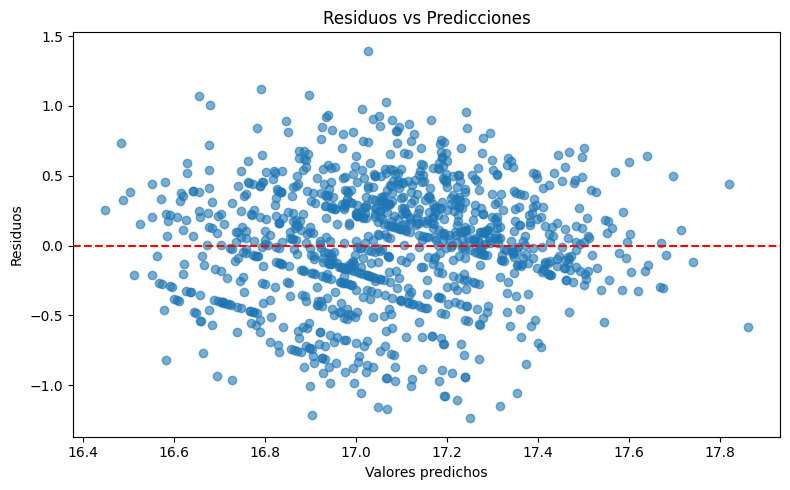

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

y_true_orig = pd.Series(
   yPrueba.iloc[:, 0],
    index=yPrueba.index
)

y_pred = results['best_estimator'].predict(xPrueba)
y_pred_orig = pd.Series(
   y_pred,  
    index=yPrueba.index
)

resid_orig = y_true_orig - y_pred_orig

plt.figure(figsize=(8,5))
plt.scatter(y_pred_orig, resid_orig, alpha=0.6)
plt.axhline(0, color='red', linewidth=1.5, linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones')
plt.tight_layout()
plt.show()

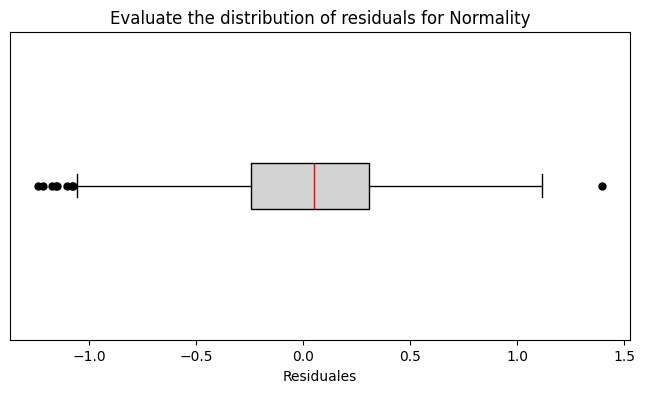

In [56]:
plt.figure(figsize=(8, 4))
plt.boxplot(resid_orig, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgray', color='black'),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markerfacecolor='black', markersize=5))
plt.title('Evaluate the distribution of residuals for Normality')
plt.xlabel('Residuales')
plt.yticks([])
plt.show()

<Figure size 600x600 with 0 Axes>

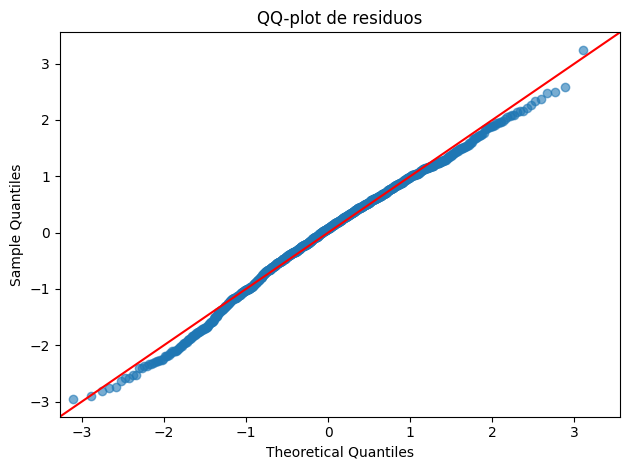

In [57]:
import statsmodels.api as sm

resid = resid_orig
plt.figure(figsize=(6,6))
sm.qqplot(resid, line='45', fit=True, alpha=0.6)
plt.title("QQ-plot de residuos")
plt.tight_layout()
plt.show()

Vemos que el modelo Ridge cumple con todos los supuestos de linealidad, cumple con la Homoscedasticidad, normalidad de los residuos y la linealidad de los mismos. Además, tiene desempeños muy similares en entrenamiento y prueba, por lo que no hay overfitting, finalmente, MAPE ≈ 2% tien una excelente precisión relativa.

In [58]:
y_pred = results['best_estimator'].predict(xPrueba)

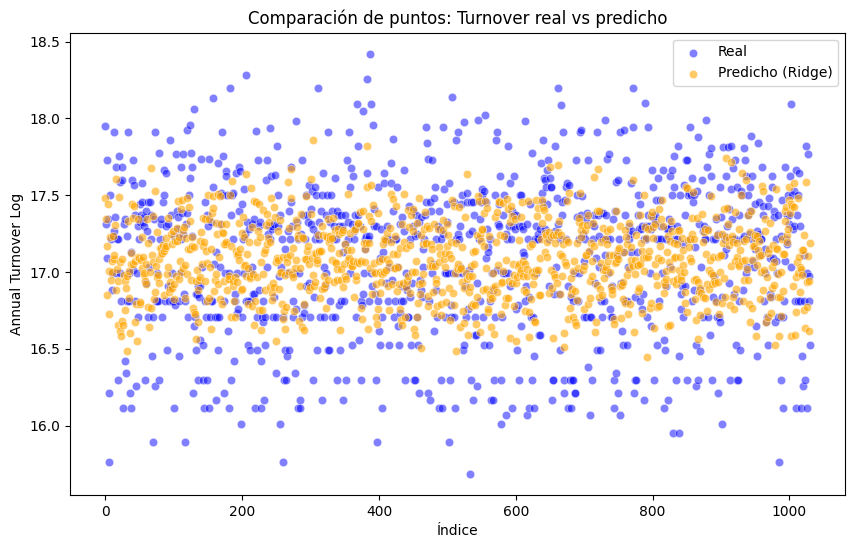

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=range(len(yPrueba)), 
    y=yPrueba['Annual Turnover Log'], 
    label='Real', 
    color='blue', 
    alpha=0.5
)

sns.scatterplot(
    x=range(len(y_pred)), 
    y=y_pred.ravel(), 
    label='Predicho (Ridge)', 
    color='orange', 
    alpha=0.6
)

plt.title("Comparación de puntos: Turnover real vs predicho")
plt.xlabel("Índice")
plt.ylabel("Annual Turnover Log")
plt.legend()
plt.show()


Por otro lado del gráfico se puede deducir que en Ridge tiene problemas prediciendo valores extremos, también se evidencia que los valores se centran en la media de los valores reales por lo cual el modelo Ridge logra captar la tendencia central general.

# XGBoost Estimator

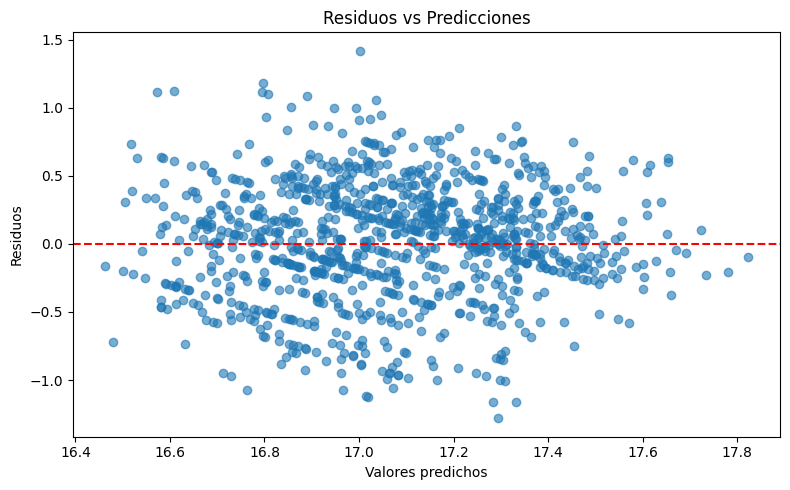

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

y_true_orig = pd.Series(
   yPrueba.iloc[:, 0],
    index=yPrueba.index
)

y_pred = results_xgb['best_estimator'].predict(xPrueba)
y_pred_orig = pd.Series(
   y_pred,  
    index=yPrueba.index
)

resid_orig = y_true_orig - y_pred_orig

plt.figure(figsize=(8,5))
plt.scatter(y_pred_orig, resid_orig, alpha=0.6)
plt.axhline(0, color='red', linewidth=1.5, linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones')
plt.tight_layout()
plt.show()

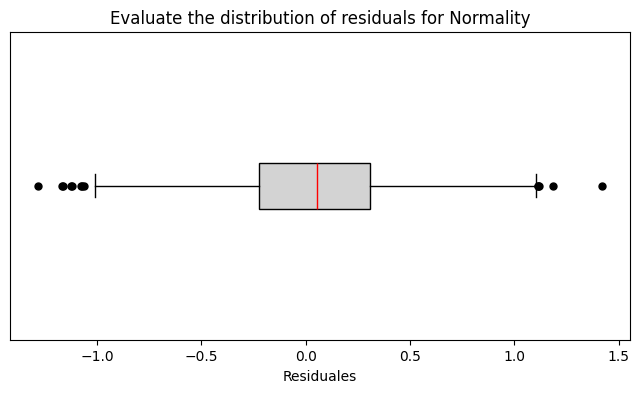

In [61]:
plt.figure(figsize=(8, 4))
plt.boxplot(resid_orig, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgray', color='black'),
            medianprops=dict(color='red'),
            flierprops=dict(marker='o', markerfacecolor='black', markersize=5))
plt.title('Evaluate the distribution of residuals for Normality')
plt.xlabel('Residuales')
plt.yticks([])
plt.show()

<Figure size 600x600 with 0 Axes>

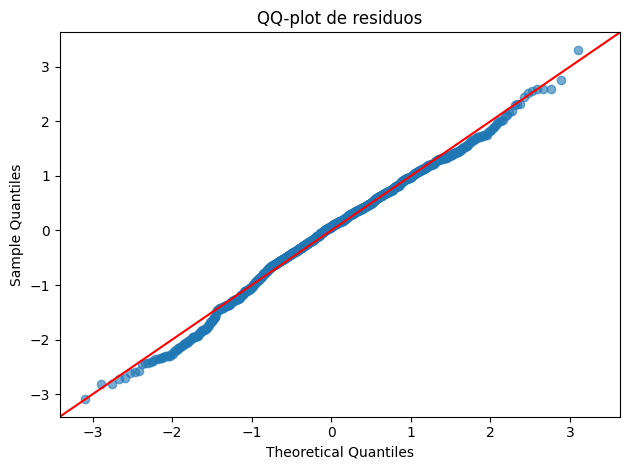

In [62]:
import statsmodels.api as sm

resid = resid_orig

plt.figure(figsize=(6,6))
sm.qqplot(resid, line='45', fit=True, alpha=0.6)
plt.title("QQ-plot de residuos")
plt.tight_layout()
plt.show()

In [63]:
y_pred = results_xgb['best_estimator'].predict(xPrueba)

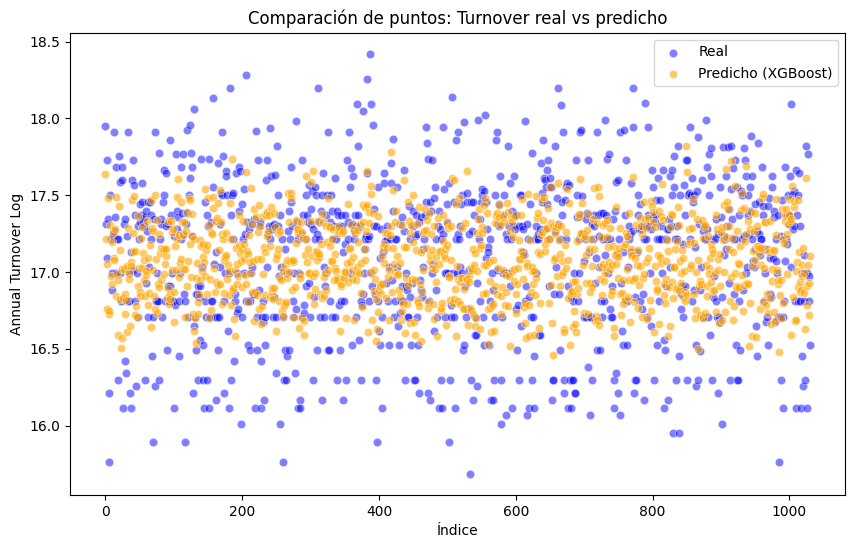

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=range(len(yPrueba)), 
    y=yPrueba['Annual Turnover Log'], 
    label='Real', 
    color='blue', 
    alpha=0.5
)

sns.scatterplot(
    x=range(len(y_pred)), 
    y=y_pred.ravel(), 
    label='Predicho (XGBoost)', 
    color='orange', 
    alpha=0.6
)

plt.title("Comparación de puntos: Turnover real vs predicho")
plt.xlabel("Índice")
plt.ylabel("Annual Turnover Log")
plt.legend()
plt.show()


El modelo XGBoost cumple también con todos los criterios de linealidad queda demostrado en las gráficas. Por otro lado, las métricas del xgboost son mejores levemente que las de Ridge, sin embargo el R2 de entrenamiento fue de 40.42%, contra el 30% de Ridge. En prueba si baja un poco a casi 30%, pero puede ser por el split del set de prueba, recordemos también que hicimos algunos cambios en las variables para reducir dimensionalidad, además ed hacer ingeniería de features, también hay unas features muy desbalanceadas como City que había ciudades con un solo representante, así que para mejorar el test podríamos mejorar la toma de datos. 

El mejor modelo depende de lo que se quiera, por un lado XGBoost es el que tiene mejor R2 es decir captura mejor la variabilidad de la facturación anual con un 40%. Por otro lado, modelos como ridge tienen un R2 menor pero puede ser un modelo más estable debido a que es un modelo más ajustado, pues tanto el desempeño como entrenamiento es bastante similar. La elección del modelo depende del objetivo final del análisis. Si se busca la mayor precisión predictiva posible, XGBoost es superior. Sin embargo, si el objetivo es comprender de forma más clara cómo afectan las variables independientes a la facturación anual, un modelo lineal como Ridge puede ser preferible debido a su interpretabilidad y menor complejidad. Para mi caso voy a priorizar predictibilidad así que eligiré XGBoost como el mejor modelo.

**Modelo de regresión lineal:**

Annual_Turnover_Log ~ Hygiene_Rating  
           + City_Reducida  
           + Cuisine  
           + City_Reducida × Cuisine  
           + Years_Open  
           + Instagram_Popularity_Quotient  
           + Years_Open × Instagram_Popularity_Quotient  
           + Liquour_License_Obtained  
           + Resturant_Type  
           + Liquour_License_Obtained × Resturant_Type  
           + Resturant_Tier  
           + Live_Music_Rating_missing  
           + Resturant_Tier × Live_Music_Rating_missing  
           + Endorsed_By  
           + Value_Deals_Rating_missing  
           + Endorsed_By × Value_Deals_Rating_missing

**Interacciones:**
- City_Reducida * Cuisine: Evalúa si el impacto del tipo de cocina en la facturación cambia según la ciudad.
- Years_Open * Instagram_Popularity_Quotient: Examina si la antigüedad del restaurante modifica el efecto de su popularidad en redes sociales.
- Liquour_License_Obtained * Resturant_Type: Determina si tener licencia de licor impacta de forma distinta según el tipo de restaurante.
- Resturant_Tier * Live_Music_Rating: Analiza si la calificación de música en vivo tiene un efecto diferente según el nivel del restaurante. 
- Endorsed_By * Value_Deals_Rating: Evalua que tipo de promociones ofrecen los restaurantes dependiendo del endorzamiento que tengan.